In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.cluster import KMeans, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import distance_metric, type_metric
from sklearn.metrics import confusion_matrix, classification_report, adjusted_rand_score, normalized_mutual_info_score, silhouette_score
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.filterwarnings("ignore", message="'force_all_finite' was renamed")
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# data imports

In [3]:
energy_complete = pd.read_csv('recs2020.csv')

In [4]:
energy_complete

DOEID    REGIONC            DIVISION  STATE_FIPS state_postal  \
0      100001       WEST      Mountain South          35           NM   
1      100002      SOUTH  West South Central           5           AR   
2      100003       WEST      Mountain South          35           NM   
3      100004      SOUTH      South Atlantic          45           SC   
4      100005  NORTHEAST     Middle Atlantic          34           NJ   
...       ...        ...                 ...         ...          ...   
18491  118492      SOUTH      South Atlantic          24           MD   
18492  118493  NORTHEAST         New England          23           ME   
18493  118494      SOUTH  West South Central          48           TX   
18494  118495      SOUTH      South Atlantic          45           SC   
18495  118496    MIDWEST  West North Central          29           MO   

           state_name   BA_climate IECC_climate_code UATYP10  HDD65  ...  \
0          New Mexico    Mixed-Dry                4B       U   3844  ...   
1            Arkansas  Mixed-Humid                4A       U   3766  ...   
2          New Mexico    Mixed-Dry                4B       U   3819  ...   
3      South Carolina  Mixed-Humid                3A       U   2614  ...   
4          New Jersey  Mixed-Humid                4A       U   4219  ...   
...               ...          ...               ...     ...    ...  ...   
18491        Maryland  Mixed-Humid                4A       U   4572  ...   
18492           Maine    Very-Cold                7A       R   9861  ...   
18493           Texas    Hot-Humid                2A       U    405  ...   
18494  South Carolina    Hot-Humid                3A       U   1245  ...   
18495        Missouri  Mixed-Humid                4A       C   4423  ...   

       EVCHRGHOME  EVCHRGAPT  EVCHRGWKS  EVCHRGBUS  EVCHRGMUNI  EVCHRGDLR  \
0            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
1            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
2            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
3            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
4            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
...           ...        ...        ...        ...         ...        ...   
18491        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18492        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18493        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18494        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18495        -2.0         -2       -2.0       -2.0        -2.0       -2.0   

       EVCHRGHWY  EVCHRGOTH  EVHOMEAMT  EVCHRGTYPE  
0           -2.0       -2.0       -2.0        -2.0  
1           -2.0       -2.0       -2.0        -2.0  
2           -2.0       -2.0       -2.0        -2.0  
3           -2.0       -2.0       -2.0        -2.0  
4           -2.0       -2.0       -2.0        -2.0  
...          ...        ...        ...         ...  
18491       -2.0       -2.0       -2.0        -2.0  
18492       -2.0       -2.0       -2.0        -2.0  
18493       -2.0       -2.0       -2.0        -2.0  
18494       -2.0       -2.0       -2.0        -2.0  
18495       -2.0       -2.0       -2.0        -2.0  

[18496 rows x 799 columns]

In [5]:
energy_complete.columns

Index(['DOEID', 'REGIONC', 'DIVISION', 'STATE_FIPS', 'state_postal',
       'state_name', 'BA_climate', 'IECC_climate_code', 'UATYP10', 'HDD65',
       ...
       'EVCHRGHOME', 'EVCHRGAPT', 'EVCHRGWKS', 'EVCHRGBUS', 'EVCHRGMUNI',
       'EVCHRGDLR', 'EVCHRGHWY', 'EVCHRGOTH', 'EVHOMEAMT', 'EVCHRGTYPE'],
      dtype='object', length=799)

In [6]:
energy_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18496 entries, 0 to 18495
Columns: 799 entries, DOEID to EVCHRGTYPE
dtypes: float64(243), int64(549), object(7)
memory usage: 112.7+ MB


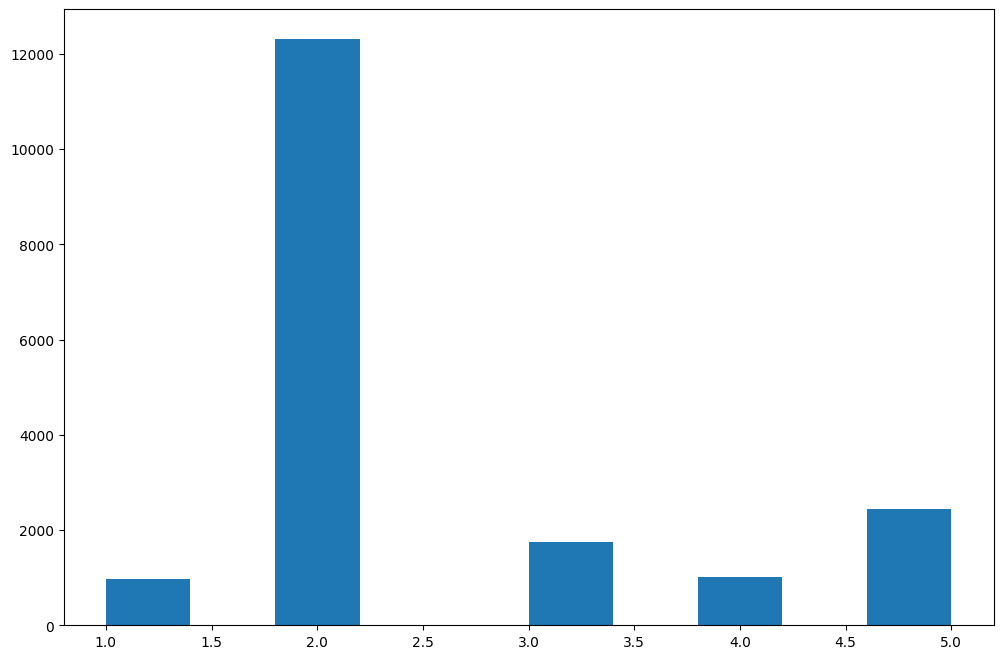

In [7]:
plt.figure(figsize=(12,8))
plt.hist(energy_complete['TYPEHUQ'])
plt.show()

In [8]:
energy_complete = energy_complete[energy_complete['TYPEHUQ'] == 2.0]

In [9]:
energy_complete

DOEID    REGIONC            DIVISION  STATE_FIPS state_postal  \
0      100001       WEST      Mountain South          35           NM   
3      100004      SOUTH      South Atlantic          45           SC   
5      100006      SOUTH  West South Central          48           TX   
6      100007      SOUTH  West South Central          40           OK   
10     100011       WEST             Pacific           6           CA   
...       ...        ...                 ...         ...          ...   
18488  118489      SOUTH      South Atlantic          12           FL   
18489  118490      SOUTH      South Atlantic          51           VA   
18492  118493  NORTHEAST         New England          23           ME   
18494  118495      SOUTH      South Atlantic          45           SC   
18495  118496    MIDWEST  West North Central          29           MO   

           state_name   BA_climate IECC_climate_code UATYP10  HDD65  ...  \
0          New Mexico    Mixed-Dry                4B       U   3844  ...   
3      South Carolina  Mixed-Humid                3A       U   2614  ...   
5               Texas    Hot-Humid                2A       U    901  ...   
6            Oklahoma  Mixed-Humid                3A       U   3148  ...   
10         California      Hot-Dry                3B       U   1467  ...   
...               ...          ...               ...     ...    ...  ...   
18488         Florida    Hot-Humid                2A       R    184  ...   
18489        Virginia  Mixed-Humid                4A       R   4856  ...   
18492           Maine    Very-Cold                7A       R   9861  ...   
18494  South Carolina    Hot-Humid                3A       U   1245  ...   
18495        Missouri  Mixed-Humid                4A       C   4423  ...   

       EVCHRGHOME  EVCHRGAPT  EVCHRGWKS  EVCHRGBUS  EVCHRGMUNI  EVCHRGDLR  \
0            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
3            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
5            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
6            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
10           -2.0         -2       -2.0       -2.0        -2.0       -2.0   
...           ...        ...        ...        ...         ...        ...   
18488        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18489        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18492        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18494        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18495        -2.0         -2       -2.0       -2.0        -2.0       -2.0   

       EVCHRGHWY  EVCHRGOTH  EVHOMEAMT  EVCHRGTYPE  
0           -2.0       -2.0       -2.0        -2.0  
3           -2.0       -2.0       -2.0        -2.0  
5           -2.0       -2.0       -2.0        -2.0  
6           -2.0       -2.0       -2.0        -2.0  
10          -2.0       -2.0       -2.0        -2.0  
...          ...        ...        ...         ...  
18488       -2.0       -2.0       -2.0        -2.0  
18489       -2.0       -2.0       -2.0        -2.0  
18492       -2.0       -2.0       -2.0        -2.0  
18494       -2.0       -2.0       -2.0        -2.0  
18495       -2.0       -2.0       -2.0        -2.0  

[12319 rows x 799 columns]

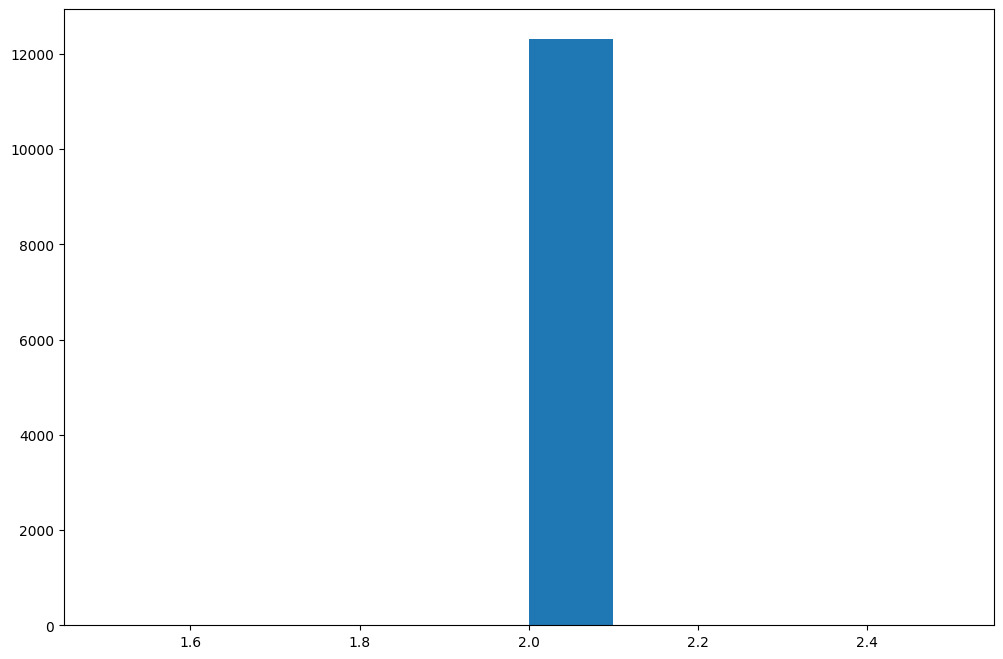

In [10]:
plt.figure(figsize=(12,8))
plt.hist(energy_complete['TYPEHUQ'])
plt.show()

In [11]:
energy_complete

DOEID    REGIONC            DIVISION  STATE_FIPS state_postal  \
0      100001       WEST      Mountain South          35           NM   
3      100004      SOUTH      South Atlantic          45           SC   
5      100006      SOUTH  West South Central          48           TX   
6      100007      SOUTH  West South Central          40           OK   
10     100011       WEST             Pacific           6           CA   
...       ...        ...                 ...         ...          ...   
18488  118489      SOUTH      South Atlantic          12           FL   
18489  118490      SOUTH      South Atlantic          51           VA   
18492  118493  NORTHEAST         New England          23           ME   
18494  118495      SOUTH      South Atlantic          45           SC   
18495  118496    MIDWEST  West North Central          29           MO   

           state_name   BA_climate IECC_climate_code UATYP10  HDD65  ...  \
0          New Mexico    Mixed-Dry                4B       U   3844  ...   
3      South Carolina  Mixed-Humid                3A       U   2614  ...   
5               Texas    Hot-Humid                2A       U    901  ...   
6            Oklahoma  Mixed-Humid                3A       U   3148  ...   
10         California      Hot-Dry                3B       U   1467  ...   
...               ...          ...               ...     ...    ...  ...   
18488         Florida    Hot-Humid                2A       R    184  ...   
18489        Virginia  Mixed-Humid                4A       R   4856  ...   
18492           Maine    Very-Cold                7A       R   9861  ...   
18494  South Carolina    Hot-Humid                3A       U   1245  ...   
18495        Missouri  Mixed-Humid                4A       C   4423  ...   

       EVCHRGHOME  EVCHRGAPT  EVCHRGWKS  EVCHRGBUS  EVCHRGMUNI  EVCHRGDLR  \
0            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
3            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
5            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
6            -2.0         -2       -2.0       -2.0        -2.0       -2.0   
10           -2.0         -2       -2.0       -2.0        -2.0       -2.0   
...           ...        ...        ...        ...         ...        ...   
18488        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18489        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18492        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18494        -2.0         -2       -2.0       -2.0        -2.0       -2.0   
18495        -2.0         -2       -2.0       -2.0        -2.0       -2.0   

       EVCHRGHWY  EVCHRGOTH  EVHOMEAMT  EVCHRGTYPE  
0           -2.0       -2.0       -2.0        -2.0  
3           -2.0       -2.0       -2.0        -2.0  
5           -2.0       -2.0       -2.0        -2.0  
6           -2.0       -2.0       -2.0        -2.0  
10          -2.0       -2.0       -2.0        -2.0  
...          ...        ...        ...         ...  
18488       -2.0       -2.0       -2.0        -2.0  
18489       -2.0       -2.0       -2.0        -2.0  
18492       -2.0       -2.0       -2.0        -2.0  
18494       -2.0       -2.0       -2.0        -2.0  
18495       -2.0       -2.0       -2.0        -2.0  

[12319 rows x 799 columns]

In [12]:
cols_to_keep = [  
                'KWHSPH', # Calibrated electricity usage for space heating, main and secondary, in kilowatt-hours, 2020
                'KWHCOL', # Calibrated electricity usage for space cooling (central air conditioning, individual units, and evaporative coolers), in kilowatthours, 2020
                'KWHWTH', # Calibrated electricity usage for water heating, main and secondary, in kilowatthours, 2020 
                'KWHRFG', # Calibrated electricity usage for all refrigerators, in kilowatthours, 2020
                'KWHFRZ', # Calibrated electricity usage for freezers, in kilowatt-hours, 2020
                'KWHCOK', # Calibrated electricity usage for cooking (cooktops, ovens, and ranges), in kilowatt-hours, 2020
                'KWHMICRO', # Calibrated electricity usage for microwaves, in kilowatt-hours, 2020
                'KWHCW', # Calibrated electricity usage for clothes washers, in kilowatt-hours, 2020
                'KWHCDR', # Calibrated electricity usage for clothes dryers, in kilowatt-hours, 2020
                'KWHDWH', # Calibrated electricity usage for dishwashers, in kilowatt-hours, 2020
                'KWHLGT', # Calibrated electricity usage for indoor and outdoor lighting, in kilowatthours, 2020
                'KWHTVREL', # Calibrated electricity usage for televisions and related peripherals, in kilowatt-hours, 2020
                'KWHAHUHEAT', # Calibrated electricity usage for distributing space heating via furnace fans and boiler pumps, in kilowatt-hours, 2020
                'KWHAHUCOL', # Calibrated electricity usage for furnace fans used for cooling, in kilowatt-hours, 2020
                'KWHCFAN', # Calibrated electricity usage for ceiling fans, in kilowatt-hours, 2020
                'KWHDHUM', # Calibrated electricity usage for dehumidifiers, in kilowatt-hours, 2020
                'KWHHUM', # Calibrated electricity usage for humidifiers, in kilowatt-hours, 2020
                'KWHPLPMP', # Calibrated electricity usage for hot tub pumps, in kilowatt-hours, 2020
                'KWHHTBHEAT', # Calibrated electricity usage for hot tub heaters, in kilowatt-hours, 2020
                'KWHEVCHRG', # Calibrated electricity usage for charging electric vehicles, in kilowatt-hours, 2020
                'KWHNEC', # Calibrated electricity usage for other purposes not elsewhere classified, in kilowatt-hours, 2020
                'KWHOTH', # Calibrated electricity usage for end uses other than space heating, space cooling, water heating, and refrigerators, in kilowatt-hours, 2020
                'TOTSQFT_EN' # Total energy-consuming area (square footage) of the housing unit. Includes all main living areas; all basements; heated, cooled, or finished attics; and heating or cooled garages
]

In [13]:
energy = energy_complete[cols_to_keep].copy()

In [14]:
energy

KWHSPH   KWHCOL   KWHWTH   KWHRFG  KWHFRZ   KWHCOK  KWHMICRO   KWHCW  \
0          0.00  3275.90     0.00   958.40  809.41     0.00    374.14  115.25   
3       2994.31  1472.33     0.00   965.40    0.00   266.78    206.94   65.31   
5          0.00  7310.65     0.00  1374.54    0.00  1175.08    140.43   89.14   
6       3480.99  4838.14     0.00   707.12    0.00   385.11    154.93   51.53   
10         0.00  2365.06     0.00  1310.01    0.00    61.87     67.95   32.80   
...         ...      ...      ...      ...     ...      ...       ...     ...   
18488      0.00  3783.58  1761.98  1887.11    0.00   361.85     87.87   91.30   
18489    536.94   105.32   261.84    64.62   55.47    32.26     40.24    5.90   
18492    617.29   748.21     0.00   610.62    0.00   211.10     43.11    0.00   
18494   1442.07  5708.15  1603.47  1225.29  915.25   128.50     68.05   32.72   
18495  10286.23  3472.37  1711.36  1123.52    0.00   368.93     60.59   58.08   

        KWHCDR  KWHDWH  ...  KWHAHUCOL  KWHCFAN  KWHDHUM  KWHHUM  KWHPLPMP  \
0      2717.97  365.30  ...     644.76   432.46     0.00    0.00       0.0   
3       562.51  204.07  ...     288.50    80.71     0.00    0.00       0.0   
5         0.00  184.83  ...     961.41    30.50     0.00    0.00       0.0   
6       800.85  103.31  ...     837.68   497.52     0.00    0.00       0.0   
10      172.83   41.09  ...     402.92   478.53     0.00   68.06       0.0   
...        ...     ...  ...        ...      ...      ...     ...       ...   
18488   808.53  108.63  ...     819.38   756.21     0.00    0.00       0.0   
18489    35.85   10.60  ...      16.63     4.23   154.25    0.00       0.0   
18492   250.37    0.00  ...     189.92    12.66   318.39    0.00       0.0   
18494   171.93   38.69  ...    1034.81   185.62     0.00    0.00       0.0   
18495   486.30   92.60  ...     354.57   158.30   118.84   14.56       0.0   

       KWHHTBHEAT  KWHEVCHRG   KWHNEC   KWHOTH  TOTSQFT_EN  
0            0.00        0.0  1239.43  8287.27        2100  
3            0.00        0.0   283.54  3843.17        2100  
5            0.00        0.0  1716.98  5666.52        4520  
6            0.00        0.0   986.53  5454.09        2100  
10           0.00        0.0  1816.69  3959.33        1630  
...           ...        ...      ...      ...         ...  
18488     1831.02        0.0   856.50  8445.46        2490  
18489        0.00        0.0   116.26   733.44        1850  
18492        0.00        0.0   165.42  2449.06        3070  
18494        0.00        0.0  5367.43  8625.37        3000  
18495        0.00        0.0   477.55  3225.33        2000  

[12319 rows x 23 columns]

<Axes: >

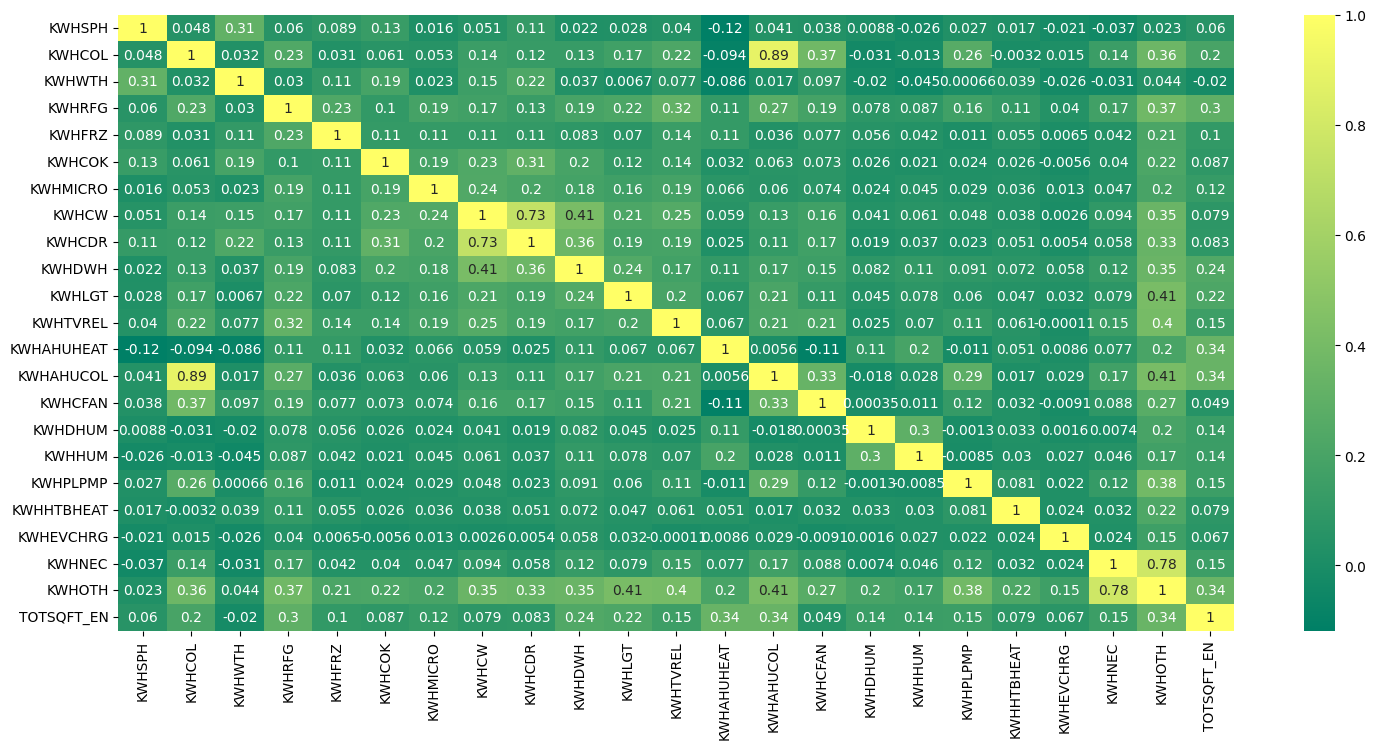

In [15]:
plt.figure(figsize=(18,8))
sns.heatmap(energy.corr(),cmap='summer',annot=True)

In [16]:
energy['KWHPLPMP_TOTAL'] = energy['KWHPLPMP'] + energy['KWHHTBHEAT']

In [17]:
energy['KWHCW_TOTAL'] = energy['KWHCW'] + energy['KWHCDR']

In [18]:
energy['KWHCOK_TOTAL'] = energy['KWHCOK'] + energy['KWHMICRO']

In [19]:
energy['KWHRFG_TOTAL'] = energy['KWHRFG'] + energy['KWHFRZ']

In [20]:
energy['KWHOTH_TOTAL'] = energy['KWHNEC'] + energy['KWHOTH']

In [21]:
energy['KWHSPH_TOTAL'] = energy['KWHSPH'] + energy['KWHAHUHEAT']

In [22]:
energy['KWHCOL_TOTAL'] = energy['KWHCOL'] + energy['KWHAHUCOL']

In [23]:
energy.drop(['KWHPLPMP','KWHHTBHEAT','KWHCW','KWHCDR',
             'KWHCOK','KWHMICRO','KWHRFG','KWHFRZ',
             'KWHNEC','KWHOTH','KWHSPH','KWHAHUHEAT',
             'KWHCOL','KWHAHUCOL'],axis=1,inplace=True)

In [24]:
energy

KWHWTH  KWHDWH   KWHLGT  KWHTVREL  KWHCFAN  KWHDHUM  KWHHUM  \
0         0.00  365.30   630.38    649.12   432.46     0.00    0.00   
3         0.00  204.07   683.32    887.08    80.71     0.00    0.00   
5         0.00  184.83   920.25    358.34    30.50     0.00    0.00   
6         0.00  103.31   419.04    947.12   497.52     0.00    0.00   
10        0.00   41.09   259.88    395.25   478.53     0.00   68.06   
...        ...     ...      ...       ...      ...      ...     ...   
18488  1761.98  108.63  1441.68    635.50   756.21     0.00    0.00   
18489   261.84   10.60    49.15    175.65     4.23   154.25    0.00   
18492     0.00    0.00   130.13    277.14    12.66   318.39    0.00   
18494  1603.47   38.69   386.23    268.25   185.62     0.00    0.00   
18495  1711.36   92.60   360.58    577.81   158.30   118.84   14.56   

       KWHEVCHRG  TOTSQFT_EN  KWHPLPMP_TOTAL  KWHCW_TOTAL  KWHCOK_TOTAL  \
0            0.0        2100            0.00      2833.22        374.14   
3            0.0        2100            0.00       627.82        473.72   
5            0.0        4520            0.00        89.14       1315.51   
6            0.0        2100            0.00       852.38        540.04   
10           0.0        1630            0.00       205.63        129.82   
...          ...         ...             ...          ...           ...   
18488        0.0        2490         1831.02       899.83        449.72   
18489        0.0        1850            0.00        41.75         72.50   
18492        0.0        3070            0.00       250.37        254.21   
18494        0.0        3000            0.00       204.65        196.55   
18495        0.0        2000            0.00       544.38        429.52   

       KWHRFG_TOTAL  KWHOTH_TOTAL  KWHSPH_TOTAL  KWHCOL_TOTAL  
0           1767.81       9526.70        309.06       3920.66  
3            965.40       4126.71       3308.71       1760.83  
5           1374.54       7383.50         89.56       8272.06  
6            707.12       6440.62       3751.47       5675.82  
10          1310.01       5776.02        161.44       2767.98  
...             ...           ...           ...           ...  
18488       1887.11       9301.96          0.00       4602.96  
18489        120.09        849.70        573.89        121.95  
18492        610.62       2614.48       1468.09        938.13  
18494       2140.54      13992.80       1469.98       6742.96  
18495       1123.52       3702.88      10382.86       3826.94  

[12319 rows x 16 columns]

In [25]:
for col in energy.columns:
    if col != 'TOTSQFT_EN':
        energy[col + '_EUI'] = energy[col] / energy['TOTSQFT_EN']

In [26]:
energy.drop('TOTSQFT_EN',axis=1,inplace=True)

In [27]:
for col in energy.columns:
    if 'EUI' not in col:
        energy.drop(col,axis=1,inplace=True)

In [28]:
energy

KWHWTH_EUI  KWHDWH_EUI  KWHLGT_EUI  KWHTVREL_EUI  KWHCFAN_EUI  \
0        0.000000    0.173952    0.300181      0.309105     0.205933   
3        0.000000    0.097176    0.325390      0.422419     0.038433   
5        0.000000    0.040892    0.203595      0.079279     0.006748   
6        0.000000    0.049195    0.199543      0.451010     0.236914   
10       0.000000    0.025209    0.159436      0.242485     0.293577   
...           ...         ...         ...           ...          ...   
18488    0.707622    0.043627    0.578988      0.255221     0.303699   
18489    0.141535    0.005730    0.026568      0.094946     0.002286   
18492    0.000000    0.000000    0.042388      0.090274     0.004124   
18494    0.534490    0.012897    0.128743      0.089417     0.061873   
18495    0.855680    0.046300    0.180290      0.288905     0.079150   

       KWHDHUM_EUI  KWHHUM_EUI  KWHEVCHRG_EUI  KWHPLPMP_TOTAL_EUI  \
0         0.000000    0.000000            0.0            0.000000   
3         0.000000    0.000000            0.0            0.000000   
5         0.000000    0.000000            0.0            0.000000   
6         0.000000    0.000000            0.0            0.000000   
10        0.000000    0.041755            0.0            0.000000   
...            ...         ...            ...                 ...   
18488     0.000000    0.000000            0.0            0.735349   
18489     0.083378    0.000000            0.0            0.000000   
18492     0.103710    0.000000            0.0            0.000000   
18494     0.000000    0.000000            0.0            0.000000   
18495     0.059420    0.007280            0.0            0.000000   

       KWHCW_TOTAL_EUI  KWHCOK_TOTAL_EUI  KWHRFG_TOTAL_EUI  KWHOTH_TOTAL_EUI  \
0             1.349152          0.178162          0.841814          4.536524   
3             0.298962          0.225581          0.459714          1.965100   
5             0.019721          0.291042          0.304102          1.633518   
6             0.405895          0.257162          0.336724          3.066962   
10            0.126153          0.079644          0.803687          3.543571   
...                ...               ...               ...               ...   
18488         0.361378          0.180610          0.757876          3.735727   
18489         0.022568          0.039189          0.064914          0.459297   
18492         0.081554          0.082805          0.198899          0.851622   
18494         0.068217          0.065517          0.713513          4.664267   
18495         0.272190          0.214760          0.561760          1.851440   

       KWHSPH_TOTAL_EUI  KWHCOL_TOTAL_EUI  
0              0.147171          1.866981  
3              1.575576          0.838490  
5              0.019814          1.830102  
6              1.786414          2.702771  
10             0.099043          1.698147  
...                 ...               ...  
18488          0.000000          1.848578  
18489          0.310211          0.065919  
18492          0.478205          0.305580  
18494          0.489993          2.247653  
18495          5.191430          1.913470  

[12319 rows x 15 columns]

<Axes: >

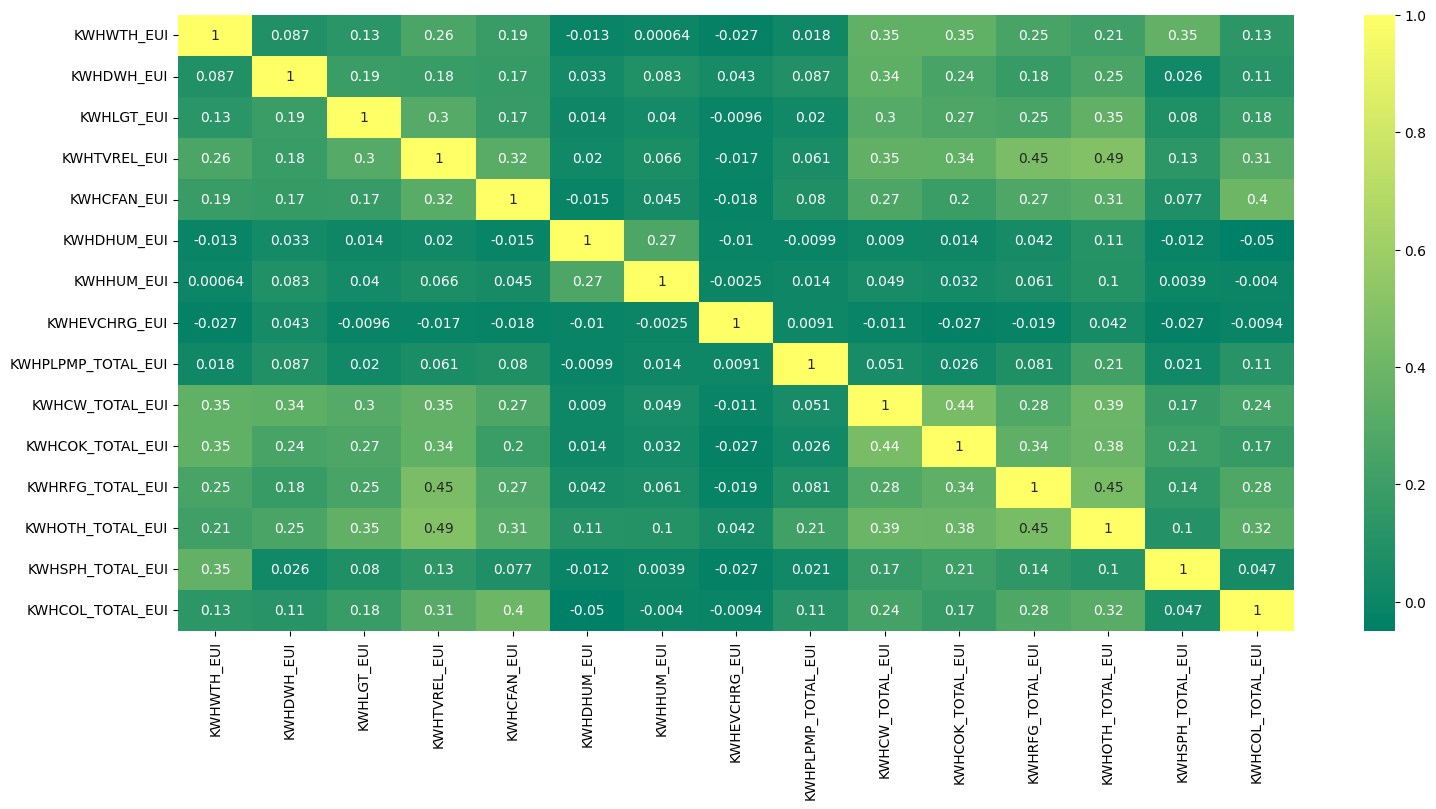

In [29]:
plt.figure(figsize=(18,8))
sns.heatmap(energy.corr(),cmap='summer',annot=True)

# data standardization

In [30]:
energy

KWHWTH_EUI  KWHDWH_EUI  KWHLGT_EUI  KWHTVREL_EUI  KWHCFAN_EUI  \
0        0.000000    0.173952    0.300181      0.309105     0.205933   
3        0.000000    0.097176    0.325390      0.422419     0.038433   
5        0.000000    0.040892    0.203595      0.079279     0.006748   
6        0.000000    0.049195    0.199543      0.451010     0.236914   
10       0.000000    0.025209    0.159436      0.242485     0.293577   
...           ...         ...         ...           ...          ...   
18488    0.707622    0.043627    0.578988      0.255221     0.303699   
18489    0.141535    0.005730    0.026568      0.094946     0.002286   
18492    0.000000    0.000000    0.042388      0.090274     0.004124   
18494    0.534490    0.012897    0.128743      0.089417     0.061873   
18495    0.855680    0.046300    0.180290      0.288905     0.079150   

       KWHDHUM_EUI  KWHHUM_EUI  KWHEVCHRG_EUI  KWHPLPMP_TOTAL_EUI  \
0         0.000000    0.000000            0.0            0.000000   
3         0.000000    0.000000            0.0            0.000000   
5         0.000000    0.000000            0.0            0.000000   
6         0.000000    0.000000            0.0            0.000000   
10        0.000000    0.041755            0.0            0.000000   
...            ...         ...            ...                 ...   
18488     0.000000    0.000000            0.0            0.735349   
18489     0.083378    0.000000            0.0            0.000000   
18492     0.103710    0.000000            0.0            0.000000   
18494     0.000000    0.000000            0.0            0.000000   
18495     0.059420    0.007280            0.0            0.000000   

       KWHCW_TOTAL_EUI  KWHCOK_TOTAL_EUI  KWHRFG_TOTAL_EUI  KWHOTH_TOTAL_EUI  \
0             1.349152          0.178162          0.841814          4.536524   
3             0.298962          0.225581          0.459714          1.965100   
5             0.019721          0.291042          0.304102          1.633518   
6             0.405895          0.257162          0.336724          3.066962   
10            0.126153          0.079644          0.803687          3.543571   
...                ...               ...               ...               ...   
18488         0.361378          0.180610          0.757876          3.735727   
18489         0.022568          0.039189          0.064914          0.459297   
18492         0.081554          0.082805          0.198899          0.851622   
18494         0.068217          0.065517          0.713513          4.664267   
18495         0.272190          0.214760          0.561760          1.851440   

       KWHSPH_TOTAL_EUI  KWHCOL_TOTAL_EUI  
0              0.147171          1.866981  
3              1.575576          0.838490  
5              0.019814          1.830102  
6              1.786414          2.702771  
10             0.099043          1.698147  
...                 ...               ...  
18488          0.000000          1.848578  
18489          0.310211          0.065919  
18492          0.478205          0.305580  
18494          0.489993          2.247653  
18495          5.191430          1.913470  

[12319 rows x 15 columns]

In [31]:
scaler = StandardScaler()

In [32]:
energy_scaled = scaler.fit_transform(energy)

In [33]:
np.mean(energy_scaled),np.std(energy_scaled)

(-5.306431665713874e-18, 1.0)

In [34]:
energy_scaled = pd.DataFrame(energy_scaled,columns=energy.columns)

In [35]:
energy_scaled

KWHWTH_EUI  KWHDWH_EUI  KWHLGT_EUI  KWHTVREL_EUI  KWHCFAN_EUI  \
0       -0.518605    2.315230   -0.155420     -0.120420     0.653225   
1       -0.518605    0.922059   -0.103053      0.202698    -0.388270   
2       -0.518605   -0.099273   -0.356057     -0.775772    -0.585286   
3       -0.518605    0.051404   -0.364475      0.284224     0.845861   
4       -0.518605   -0.383855   -0.447789     -0.310388     1.198181   
...           ...         ...         ...           ...          ...   
12314    0.002562   -0.049646    0.423743     -0.274070     1.261119   
12315   -0.414364   -0.737315   -0.723795     -0.731097    -0.613026   
12316   -0.518605   -0.841286   -0.690932     -0.744420    -0.601602   
12317   -0.124951   -0.607265   -0.511546     -0.746864    -0.242523   
12318    0.111607   -0.001133   -0.404469     -0.178020    -0.135098   

       KWHDHUM_EUI  KWHHUM_EUI  KWHEVCHRG_EUI  KWHPLPMP_TOTAL_EUI  \
0        -0.335988   -0.332036      -0.088994           -0.263616   
1        -0.335988   -0.332036      -0.088994           -0.263616   
2        -0.335988   -0.332036      -0.088994           -0.263616   
3        -0.335988   -0.332036      -0.088994           -0.263616   
4        -0.335988    0.365912      -0.088994           -0.263616   
...            ...         ...            ...                 ...   
12314    -0.335988   -0.332036      -0.088994            1.248592   
12315    -0.068313   -0.332036      -0.088994           -0.263616   
12316    -0.003041   -0.332036      -0.088994           -0.263616   
12317    -0.335988   -0.332036      -0.088994           -0.263616   
12318    -0.145228   -0.210347      -0.088994           -0.263616   

       KWHCW_TOTAL_EUI  KWHCOK_TOTAL_EUI  KWHRFG_TOTAL_EUI  KWHOTH_TOTAL_EUI  \
0             2.468177          0.025226          0.501495          0.114688   
1            -0.081205          0.285323         -0.372616         -0.594208   
2            -0.759073          0.644382         -0.728603         -0.685620   
3             0.178380          0.458547         -0.653975         -0.290444   
4            -0.500705         -0.515152          0.414273         -0.159052   
...                ...               ...               ...               ...   
12314         0.070312          0.038656          0.309472         -0.106078   
12315        -0.752164         -0.737050         -1.275782         -1.009332   
12316        -0.608972         -0.497817         -0.969270         -0.901175   
12317        -0.641349         -0.592642          0.207987          0.149904   
12318        -0.146195          0.225969         -0.139171         -0.625542   

       KWHSPH_TOTAL_EUI  KWHCOL_TOTAL_EUI  
0             -0.451513          0.390188  
1              0.417658         -0.329103  
2             -0.529009          0.364396  
3              0.545950          0.974712  
4             -0.480799          0.272112  
...                 ...               ...  
12314         -0.541066          0.377318  
12315         -0.352305         -0.869413  
12316         -0.250082         -0.701802  
12317         -0.242909          0.656418  
12318          2.617870          0.422701  

[12319 rows x 15 columns]

# dimensionality reduction algorithms

## pca 

In [36]:
pca_general = PCA()

In [37]:
pca_general.fit(energy_scaled)

PCA()

In [38]:
explained_variance = pca_general.explained_variance_ratio_

In [39]:
explained_variance

array([0.24398251, 0.08905656, 0.08410163, 0.07077737, 0.0671566 ,
       0.06387422, 0.05888915, 0.05053865, 0.04824334, 0.04531557,
       0.03978539, 0.03797969, 0.03699814, 0.03323945, 0.03006174])

In [40]:
eigenvalues = pca_general.explained_variance_

In [41]:
eigenvalues

array([3.66003479, 1.33595677, 1.2616268 , 1.06174679, 1.00743075,
       0.95819103, 0.88340891, 0.7581413 , 0.72370877, 0.67978877,
       0.59682924, 0.56974164, 0.55501716, 0.49863223, 0.45096276])

In [42]:
selected_components = []

for i in eigenvalues:
    if i > 1:
        selected_components.append(i)
    
print(selected_components)

[3.6600347850349793, 1.3359567737732112, 1.2616268021105896, 1.0617467928069309, 1.0074307530128825]


In [43]:
N_COMPONENTS = len(selected_components)

In [44]:
eigenvectors = pca_general.components_

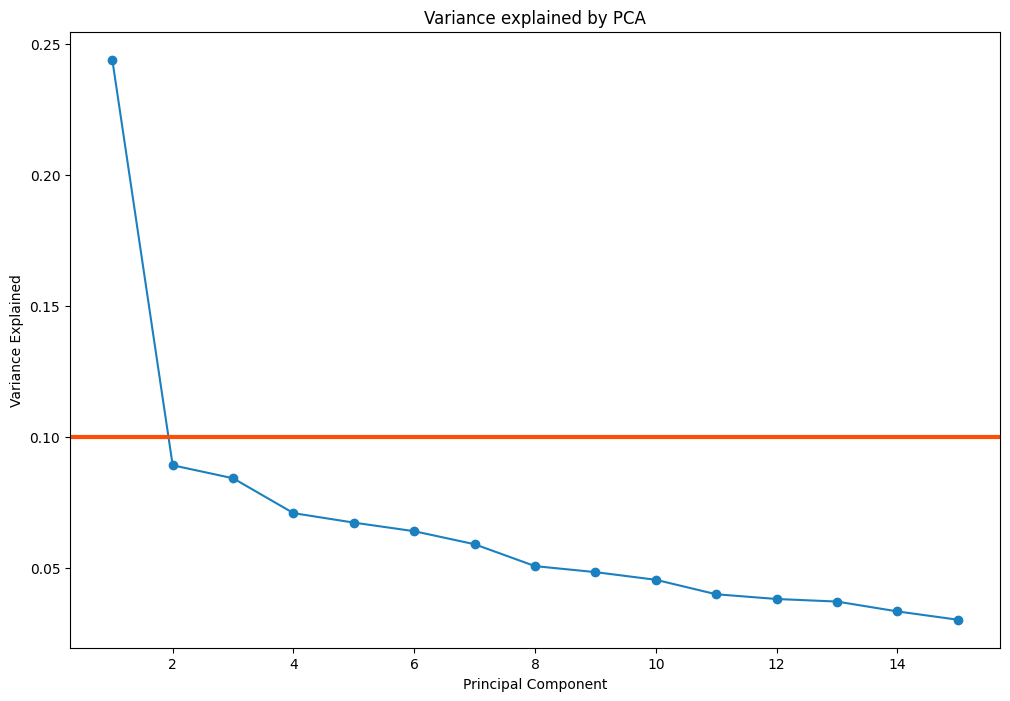

In [45]:
plt.figure(figsize=(12,8))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-', color='#1B80BF')
plt.axhline(y=0.1, color='#FC4E07', linewidth=3)
plt.title('Variance explained by PCA')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [46]:
pca = PCA(n_components=N_COMPONENTS)

In [47]:
X_pca = pca.fit_transform(energy_scaled)

In [48]:
pca_columns = [f'dim_{i+1}' for i in range(N_COMPONENTS)]

In [49]:
X_pca = pd.DataFrame(X_pca, columns=pca_columns)

In [50]:
X_pca

dim_1     dim_2     dim_3     dim_4     dim_5
0      1.543702  0.258584 -0.580326  1.619720 -0.792301
1     -0.351672 -0.394433  0.175816  0.764255 -0.293136
2     -1.293976 -0.267965 -0.345617  0.257281 -0.375487
3      0.293213 -0.534446 -0.632247 -0.335516 -0.209140
4     -0.400643  0.400345 -0.884748 -0.833782 -0.289551
...         ...       ...       ...       ...       ...
12314  0.556375  0.098547 -1.307509 -0.300303  0.488534
12315 -2.558672 -0.305181  0.153895 -0.035944 -0.029535
12316 -2.263767 -0.295517  0.159338 -0.115972 -0.048087
12317 -0.856140 -0.243166 -0.688232 -0.603251 -0.009107
12318  0.041957 -1.518876  0.993335 -0.543110  0.742956

[12319 rows x 5 columns]

## t-SNE

In [51]:
tsne = TSNE(n_components=3,random_state=42)

In [52]:
X_tsne = tsne.fit_transform(energy_scaled)

In [53]:
tsne_columns = [f'dim_{i+1}' for i in range(3)]

In [54]:
X_tsne = pd.DataFrame(X_tsne, columns=tsne_columns)

In [55]:
X_tsne

dim_1      dim_2      dim_3
0      16.231346   8.248657  11.700863
1       0.272585  11.339334   9.129846
2      -3.239037   3.119947   7.980419
3       7.676277 -16.397511  -6.212668
4       3.977556  -6.556377  -6.745644
...          ...        ...        ...
12314   3.345616   1.931769 -22.331991
12315 -22.194139   2.152212   1.332350
12316 -19.936359   3.257161   5.869900
12317  -2.557805  -9.656290 -15.012179
12318   6.495749 -24.995672   7.614882

[12319 rows x 3 columns]

## umap

In [56]:
umap = umap.UMAP(n_components=3,random_state=42)

In [57]:
X_umap = umap.fit_transform(energy_scaled)

In [58]:
umap_columns = [f'dim_{i+1}' for i in range(3)]

In [59]:
X_umap = pd.DataFrame(X_umap, columns=umap_columns)

# clustering algorithms

## k-means 

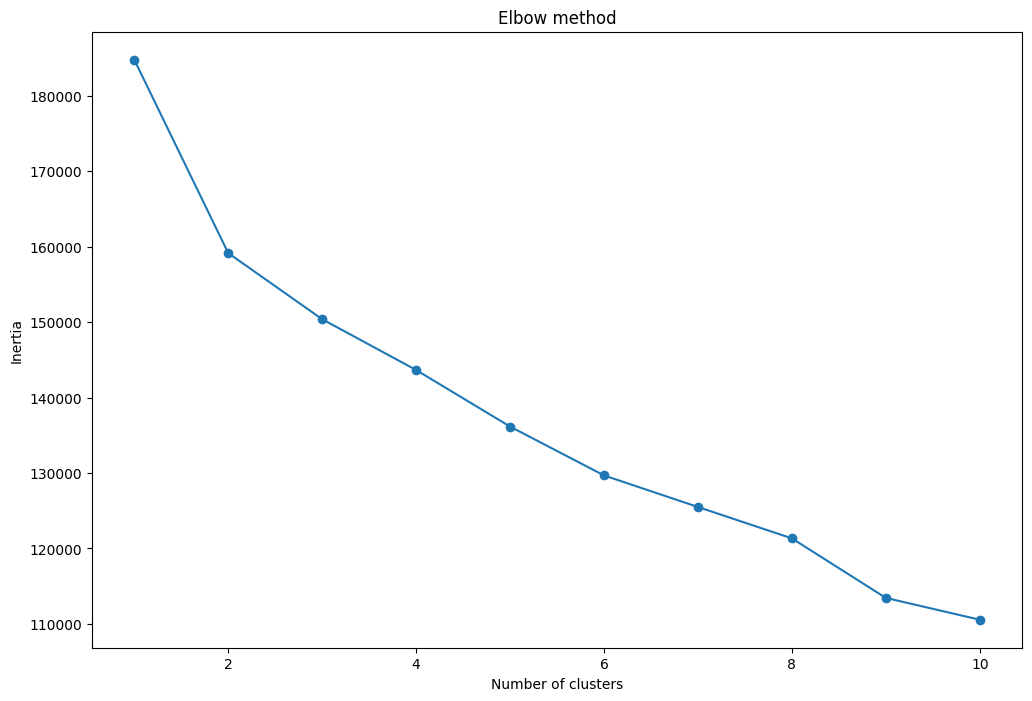

In [60]:
data = energy_scaled
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [61]:
kmeans = KMeans(n_clusters=6,init='k-means++',random_state=42)

In [62]:
kmeans.fit(energy_scaled)

KMeans(n_clusters=6, random_state=42)

In [63]:
df_kmeans = energy_scaled.copy()

In [64]:
df_kmeans['k_means'] = kmeans.labels_

In [65]:
df_kmeans

KWHWTH_EUI  KWHDWH_EUI  KWHLGT_EUI  KWHTVREL_EUI  KWHCFAN_EUI  \
0       -0.518605    2.315230   -0.155420     -0.120420     0.653225   
1       -0.518605    0.922059   -0.103053      0.202698    -0.388270   
2       -0.518605   -0.099273   -0.356057     -0.775772    -0.585286   
3       -0.518605    0.051404   -0.364475      0.284224     0.845861   
4       -0.518605   -0.383855   -0.447789     -0.310388     1.198181   
...           ...         ...         ...           ...          ...   
12314    0.002562   -0.049646    0.423743     -0.274070     1.261119   
12315   -0.414364   -0.737315   -0.723795     -0.731097    -0.613026   
12316   -0.518605   -0.841286   -0.690932     -0.744420    -0.601602   
12317   -0.124951   -0.607265   -0.511546     -0.746864    -0.242523   
12318    0.111607   -0.001133   -0.404469     -0.178020    -0.135098   

       KWHDHUM_EUI  KWHHUM_EUI  KWHEVCHRG_EUI  KWHPLPMP_TOTAL_EUI  \
0        -0.335988   -0.332036      -0.088994           -0.263616   
1        -0.335988   -0.332036      -0.088994           -0.263616   
2        -0.335988   -0.332036      -0.088994           -0.263616   
3        -0.335988   -0.332036      -0.088994           -0.263616   
4        -0.335988    0.365912      -0.088994           -0.263616   
...            ...         ...            ...                 ...   
12314    -0.335988   -0.332036      -0.088994            1.248592   
12315    -0.068313   -0.332036      -0.088994           -0.263616   
12316    -0.003041   -0.332036      -0.088994           -0.263616   
12317    -0.335988   -0.332036      -0.088994           -0.263616   
12318    -0.145228   -0.210347      -0.088994           -0.263616   

       KWHCW_TOTAL_EUI  KWHCOK_TOTAL_EUI  KWHRFG_TOTAL_EUI  KWHOTH_TOTAL_EUI  \
0             2.468177          0.025226          0.501495          0.114688   
1            -0.081205          0.285323         -0.372616         -0.594208   
2            -0.759073          0.644382         -0.728603         -0.685620   
3             0.178380          0.458547         -0.653975         -0.290444   
4            -0.500705         -0.515152          0.414273         -0.159052   
...                ...               ...               ...               ...   
12314         0.070312          0.038656          0.309472         -0.106078   
12315        -0.752164         -0.737050         -1.275782         -1.009332   
12316        -0.608972         -0.497817         -0.969270         -0.901175   
12317        -0.641349         -0.592642          0.207987          0.149904   
12318        -0.146195          0.225969         -0.139171         -0.625542   

       KWHSPH_TOTAL_EUI  KWHCOL_TOTAL_EUI  k_means  
0             -0.451513          0.390188        0  
1              0.417658         -0.329103        1  
2             -0.529009          0.364396        1  
3              0.545950          0.974712        0  
4             -0.480799          0.272112        1  
...                 ...               ...      ...  
12314         -0.541066          0.377318        0  
12315         -0.352305         -0.869413        1  
12316         -0.250082         -0.701802        1  
12317         -0.242909          0.656418        1  
12318          2.617870          0.422701        3  

[12319 rows x 16 columns]

In [66]:
df_kmeans['k_means'].unique()

array([0, 1, 3, 2, 5, 4])

In [67]:
df_kmeans.groupby(df_kmeans['k_means']).mean() 

KWHWTH_EUI  KWHDWH_EUI  KWHLGT_EUI  KWHTVREL_EUI  KWHCFAN_EUI  \
k_means                                                                  
0          0.027612    0.439569    0.360078      0.510487     0.638816   
1         -0.243863   -0.252129   -0.241123     -0.348666    -0.318785   
2         -0.055233    0.291228    0.085050      0.134315     0.044033   
3          1.193272   -0.004376    0.014837      0.153535    -0.008974   
4         -0.253888    0.509438   -0.105269     -0.174222    -0.251522   
5          1.842639    1.245301    2.164598      2.801642     1.720966   

         KWHDHUM_EUI  KWHHUM_EUI  KWHEVCHRG_EUI  KWHPLPMP_TOTAL_EUI  \
k_means                                                               
0          -0.253504   -0.153564      -0.069211            0.383216   
1          -0.125752   -0.106000      -0.059494           -0.139232   
2           2.772579    1.919654      -0.035355           -0.083071   
3          -0.167763   -0.130172      -0.085078           -0.099184   
4          -0.232983   -0.136257      11.519299           -0.016486   
5          -0.121327    0.192377      -0.079016            0.338464   

         KWHCW_TOTAL_EUI  KWHCOK_TOTAL_EUI  KWHRFG_TOTAL_EUI  \
k_means                                                        
0               0.392545          0.305359          0.585776   
1              -0.311155         -0.308617         -0.373791   
2               0.066423          0.116162          0.224429   
3               0.315145          0.533559          0.263808   
4              -0.119528         -0.266509         -0.137464   
5               2.605290          2.564529          2.202385   

         KWHOTH_TOTAL_EUI  KWHSPH_TOTAL_EUI  KWHCOL_TOTAL_EUI  
k_means                                                        
0                0.546873         -0.193458          0.776775  
1               -0.380240         -0.264446         -0.345253  
2                0.396402         -0.131180         -0.076030  
3                0.010986          2.398099         -0.049803  
4                0.428792         -0.335826         -0.114155  
5                2.972351          0.747620          1.480262

In [68]:
sil = silhouette_score(df_kmeans.iloc[:,:-1], df_kmeans['k_means'])
ch = calinski_harabasz_score(df_kmeans.iloc[:,:-1], df_kmeans['k_means'])
db = davies_bouldin_score(df_kmeans.iloc[:,:-1], df_kmeans['k_means'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.2506216103404207
Calinski-Harabasz: 1106.1506662133352
Davies-Bouldin: 1.8837030933333783


### k-means with pca

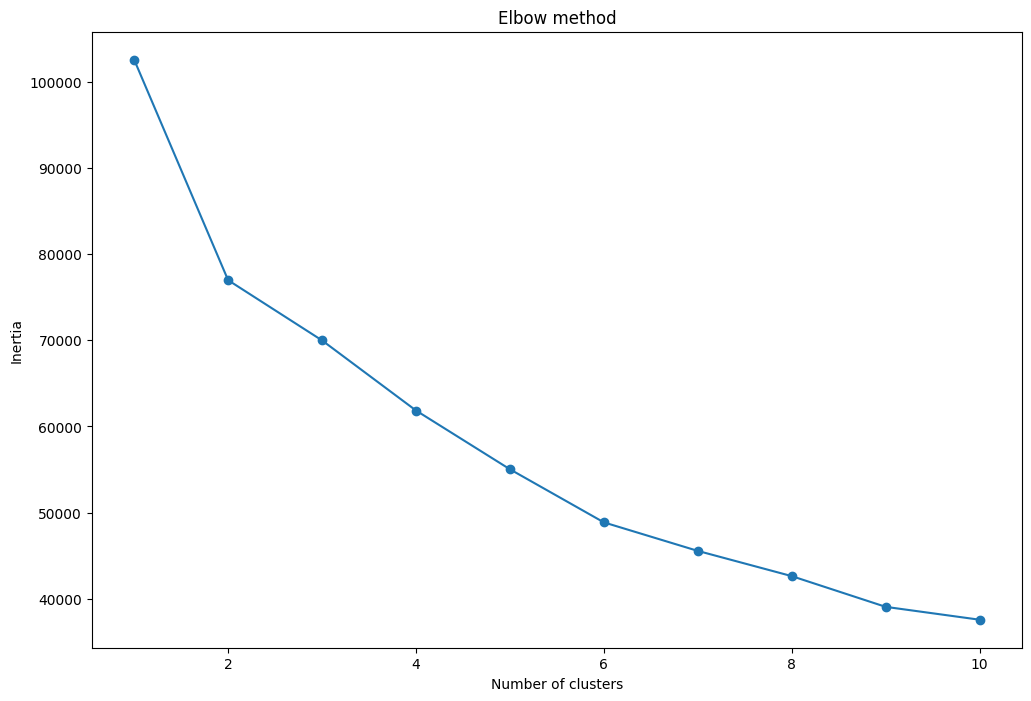

In [69]:
data = X_pca
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [70]:
kmeans_pca = KMeans(n_clusters=6,init='k-means++',random_state=42)

In [71]:
kmeans_pca.fit(X_pca)

KMeans(n_clusters=6, random_state=42)

In [72]:
df_pca_kmeans = energy_scaled.copy()

In [73]:
df_pca_kmeans["kmeans_pca"] = kmeans_pca.labels_

In [74]:
df_pca_kmeans

KWHWTH_EUI  KWHDWH_EUI  KWHLGT_EUI  KWHTVREL_EUI  KWHCFAN_EUI  \
0       -0.518605    2.315230   -0.155420     -0.120420     0.653225   
1       -0.518605    0.922059   -0.103053      0.202698    -0.388270   
2       -0.518605   -0.099273   -0.356057     -0.775772    -0.585286   
3       -0.518605    0.051404   -0.364475      0.284224     0.845861   
4       -0.518605   -0.383855   -0.447789     -0.310388     1.198181   
...           ...         ...         ...           ...          ...   
12314    0.002562   -0.049646    0.423743     -0.274070     1.261119   
12315   -0.414364   -0.737315   -0.723795     -0.731097    -0.613026   
12316   -0.518605   -0.841286   -0.690932     -0.744420    -0.601602   
12317   -0.124951   -0.607265   -0.511546     -0.746864    -0.242523   
12318    0.111607   -0.001133   -0.404469     -0.178020    -0.135098   

       KWHDHUM_EUI  KWHHUM_EUI  KWHEVCHRG_EUI  KWHPLPMP_TOTAL_EUI  \
0        -0.335988   -0.332036      -0.088994           -0.263616   
1        -0.335988   -0.332036      -0.088994           -0.263616   
2        -0.335988   -0.332036      -0.088994           -0.263616   
3        -0.335988   -0.332036      -0.088994           -0.263616   
4        -0.335988    0.365912      -0.088994           -0.263616   
...            ...         ...            ...                 ...   
12314    -0.335988   -0.332036      -0.088994            1.248592   
12315    -0.068313   -0.332036      -0.088994           -0.263616   
12316    -0.003041   -0.332036      -0.088994           -0.263616   
12317    -0.335988   -0.332036      -0.088994           -0.263616   
12318    -0.145228   -0.210347      -0.088994           -0.263616   

       KWHCW_TOTAL_EUI  KWHCOK_TOTAL_EUI  KWHRFG_TOTAL_EUI  KWHOTH_TOTAL_EUI  \
0             2.468177          0.025226          0.501495          0.114688   
1            -0.081205          0.285323         -0.372616         -0.594208   
2            -0.759073          0.644382         -0.728603         -0.685620   
3             0.178380          0.458547         -0.653975         -0.290444   
4            -0.500705         -0.515152          0.414273         -0.159052   
...                ...               ...               ...               ...   
12314         0.070312          0.038656          0.309472         -0.106078   
12315        -0.752164         -0.737050         -1.275782         -1.009332   
12316        -0.608972         -0.497817         -0.969270         -0.901175   
12317        -0.641349         -0.592642          0.207987          0.149904   
12318        -0.146195          0.225969         -0.139171         -0.625542   

       KWHSPH_TOTAL_EUI  KWHCOL_TOTAL_EUI  kmeans_pca  
0             -0.451513          0.390188           5  
1              0.417658         -0.329103           1  
2             -0.529009          0.364396           1  
3              0.545950          0.974712           5  
4             -0.480799          0.272112           1  
...                 ...               ...         ...  
12314         -0.541066          0.377318           5  
12315         -0.352305         -0.869413           1  
12316         -0.250082         -0.701802           1  
12317         -0.242909          0.656418           1  
12318          2.617870          0.422701           0  

[12319 rows x 16 columns]

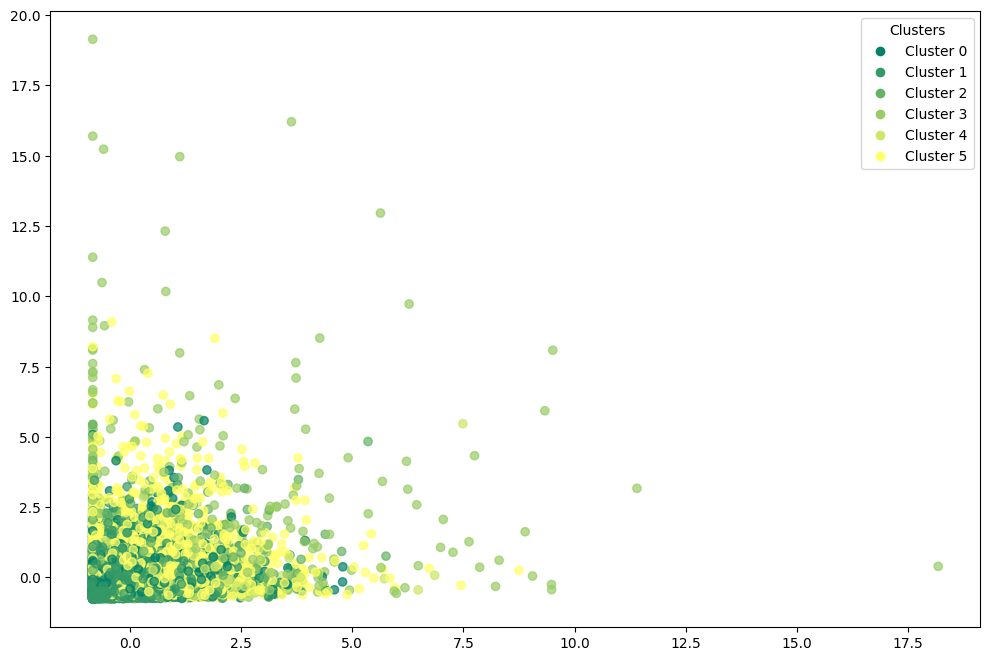

In [75]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pca_kmeans.iloc[:, 1], df_pca_kmeans.iloc[:, 2], 
                      c=df_pca_kmeans['kmeans_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_kmeans['kmeans_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [76]:
df_pca_kmeans.groupby(df_pca_kmeans['kmeans_pca']).mean() 

KWHWTH_EUI  KWHDWH_EUI  KWHLGT_EUI  KWHTVREL_EUI  KWHCFAN_EUI  \
kmeans_pca                                                                  
0             1.452280    0.011727    0.006803      0.207003    -0.004357   
1            -0.268036   -0.267665   -0.278678     -0.385561    -0.337215   
2            -0.101239    0.311539    0.119118      0.155555     0.039709   
3             1.482072    1.277602    1.953478      2.546230     1.834854   
4            -0.037869    0.485405   -0.002122      0.140525     0.320973   
5            -0.116139    0.347084    0.379342      0.452328     0.526782   

            KWHDHUM_EUI  KWHHUM_EUI  KWHEVCHRG_EUI  KWHPLPMP_TOTAL_EUI  \
kmeans_pca                                                               
0             -0.166072   -0.146457      -0.085640           -0.100959   
1             -0.103053   -0.114984      -0.060331           -0.143748   
2              2.591611    2.213620      -0.055953           -0.083322   
3             -0.123556    0.045070      -0.060345            0.002034   
4             -0.189455   -0.065532       2.591705            4.021245   
5             -0.235927   -0.165362      -0.084479           -0.035153   

            KWHCW_TOTAL_EUI  KWHCOK_TOTAL_EUI  KWHRFG_TOTAL_EUI  \
kmeans_pca                                                        
0                  0.461210          0.705991          0.360407   
1                 -0.346363         -0.341472         -0.407867   
2                  0.077905          0.127820          0.248690   
3                  2.385935          2.221520          2.120840   
4                  0.098071         -0.042997          0.256857   
5                  0.297327          0.212785          0.470194   

            KWHOTH_TOTAL_EUI  KWHSPH_TOTAL_EUI  KWHCOL_TOTAL_EUI  
kmeans_pca                                                        
0                   0.080328          1.873315         -0.090071  
1                  -0.418966         -0.237744         -0.363300  
2                   0.408977         -0.131317         -0.079679  
3                   2.614724          0.619005          1.613996  
4                   1.033231         -0.067406          0.472262  
5                   0.418675         -0.230518          0.667693

In [77]:
sil = silhouette_score(df_pca_kmeans.iloc[:,:-1], df_pca_kmeans['kmeans_pca'])
ch = calinski_harabasz_score(df_pca_kmeans.iloc[:,:-1], df_pca_kmeans['kmeans_pca'])
db = davies_bouldin_score(df_pca_kmeans.iloc[:,:-1], df_pca_kmeans['kmeans_pca'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.2118010484114482
Calinski-Harabasz: 1033.0323438838313
Davies-Bouldin: 2.0433988976888586


### k-means with t-SNE

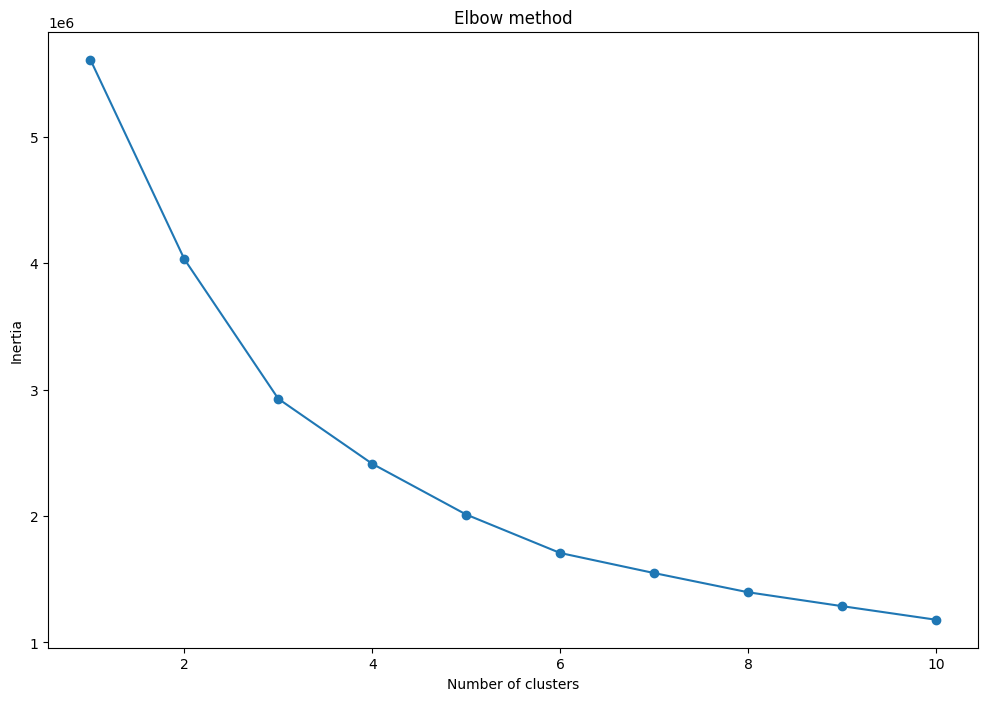

In [78]:
data = X_tsne
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [79]:
kmeans_tsne = KMeans(n_clusters=6,init='k-means++',random_state=42)

In [80]:
kmeans_tsne.fit(X_tsne)

KMeans(n_clusters=6, random_state=42)

In [81]:
df_tsne_kmeans = energy_scaled.copy()

In [82]:
df_tsne_kmeans['kmeans_tsne'] = kmeans_tsne.labels_

In [83]:
df_tsne_kmeans

KWHWTH_EUI  KWHDWH_EUI  KWHLGT_EUI  KWHTVREL_EUI  KWHCFAN_EUI  \
0       -0.518605    2.315230   -0.155420     -0.120420     0.653225   
1       -0.518605    0.922059   -0.103053      0.202698    -0.388270   
2       -0.518605   -0.099273   -0.356057     -0.775772    -0.585286   
3       -0.518605    0.051404   -0.364475      0.284224     0.845861   
4       -0.518605   -0.383855   -0.447789     -0.310388     1.198181   
...           ...         ...         ...           ...          ...   
12314    0.002562   -0.049646    0.423743     -0.274070     1.261119   
12315   -0.414364   -0.737315   -0.723795     -0.731097    -0.613026   
12316   -0.518605   -0.841286   -0.690932     -0.744420    -0.601602   
12317   -0.124951   -0.607265   -0.511546     -0.746864    -0.242523   
12318    0.111607   -0.001133   -0.404469     -0.178020    -0.135098   

       KWHDHUM_EUI  KWHHUM_EUI  KWHEVCHRG_EUI  KWHPLPMP_TOTAL_EUI  \
0        -0.335988   -0.332036      -0.088994           -0.263616   
1        -0.335988   -0.332036      -0.088994           -0.263616   
2        -0.335988   -0.332036      -0.088994           -0.263616   
3        -0.335988   -0.332036      -0.088994           -0.263616   
4        -0.335988    0.365912      -0.088994           -0.263616   
...            ...         ...            ...                 ...   
12314    -0.335988   -0.332036      -0.088994            1.248592   
12315    -0.068313   -0.332036      -0.088994           -0.263616   
12316    -0.003041   -0.332036      -0.088994           -0.263616   
12317    -0.335988   -0.332036      -0.088994           -0.263616   
12318    -0.145228   -0.210347      -0.088994           -0.263616   

       KWHCW_TOTAL_EUI  KWHCOK_TOTAL_EUI  KWHRFG_TOTAL_EUI  KWHOTH_TOTAL_EUI  \
0             2.468177          0.025226          0.501495          0.114688   
1            -0.081205          0.285323         -0.372616         -0.594208   
2            -0.759073          0.644382         -0.728603         -0.685620   
3             0.178380          0.458547         -0.653975         -0.290444   
4            -0.500705         -0.515152          0.414273         -0.159052   
...                ...               ...               ...               ...   
12314         0.070312          0.038656          0.309472         -0.106078   
12315        -0.752164         -0.737050         -1.275782         -1.009332   
12316        -0.608972         -0.497817         -0.969270         -0.901175   
12317        -0.641349         -0.592642          0.207987          0.149904   
12318        -0.146195          0.225969         -0.139171         -0.625542   

       KWHSPH_TOTAL_EUI  KWHCOL_TOTAL_EUI  kmeans_tsne  
0             -0.451513          0.390188            5  
1              0.417658         -0.329103            3  
2             -0.529009          0.364396            3  
3              0.545950          0.974712            0  
4             -0.480799          0.272112            2  
...                 ...               ...          ...  
12314         -0.541066          0.377318            2  
12315         -0.352305         -0.869413            4  
12316         -0.250082         -0.701802            4  
12317         -0.242909          0.656418            2  
12318          2.617870          0.422701            0  

[12319 rows x 16 columns]

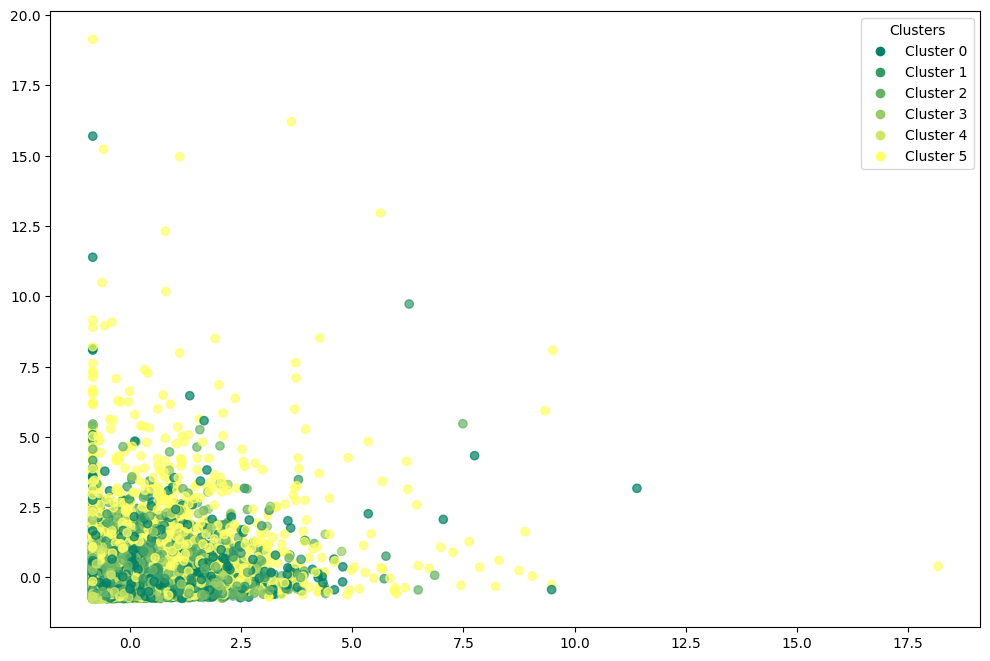

In [84]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_tsne_kmeans.iloc[:, 1], df_tsne_kmeans.iloc[:, 2], 
                      c=df_tsne_kmeans['kmeans_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_kmeans['kmeans_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [85]:
df_tsne_kmeans.groupby(df_tsne_kmeans['kmeans_tsne']).mean()

KWHWTH_EUI  KWHDWH_EUI  KWHLGT_EUI  KWHTVREL_EUI  KWHCFAN_EUI  \
kmeans_tsne                                                                  
0              0.966386    0.005820   -0.054299      0.115445     0.194475   
1             -0.399487    0.102581   -0.100585     -0.273276    -0.236923   
2             -0.197812   -0.009899   -0.086634      0.022635     0.333045   
3             -0.174359   -0.038317   -0.152816     -0.184898    -0.219258   
4             -0.321414   -0.552050   -0.399467     -0.471505    -0.426965   
5             -0.207198    0.543088    0.785594      0.669326     0.142006   

             KWHDHUM_EUI  KWHHUM_EUI  KWHEVCHRG_EUI  KWHPLPMP_TOTAL_EUI  \
kmeans_tsne                                                               
0              -0.246735   -0.189965      -0.086865           -0.220142   
1              -0.041415    1.015217       0.579351           -0.185005   
2              -0.239074   -0.223235      -0.075632            0.863704   
3               1.601192    0.290986      -0.081450           -0.210842   
4              -0.273772   -0.283735      -0.087115           -0.244424   
5              -0.226575   -0.164167      -0.085528           -0.220579   

             KWHCW_TOTAL_EUI  KWHCOK_TOTAL_EUI  KWHRFG_TOTAL_EUI  \
kmeans_tsne                                                        
0                   0.261784          0.270346          0.102480   
1                  -0.274309         -0.356588         -0.312045   
2                  -0.124766         -0.176720         -0.035015   
3                  -0.131302          0.199620         -0.180156   
4                  -0.460727         -0.467901         -0.564510   
5                   0.614865          0.499188          0.880830   

             KWHOTH_TOTAL_EUI  KWHSPH_TOTAL_EUI  KWHCOL_TOTAL_EUI  
kmeans_tsne                                                        
0                   -0.097562          1.016192          0.008891  
1                   -0.216146         -0.332848         -0.353184  
2                    0.431844         -0.217528          0.696214  
3                   -0.102346         -0.185194         -0.297800  
4                   -0.599690         -0.375528         -0.522653  
5                    0.474273         -0.230952          0.180781

In [86]:
sil = silhouette_score(df_tsne_kmeans.iloc[:,:-1], df_tsne_kmeans['kmeans_tsne'])
ch = calinski_harabasz_score(df_tsne_kmeans.iloc[:,:-1], df_tsne_kmeans['kmeans_tsne'])
db = davies_bouldin_score(df_tsne_kmeans.iloc[:,:-1], df_tsne_kmeans['kmeans_tsne'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: -0.06532803105459947
Calinski-Harabasz: 499.3594909403186
Davies-Bouldin: 2.82520827708818


### k-means with umap

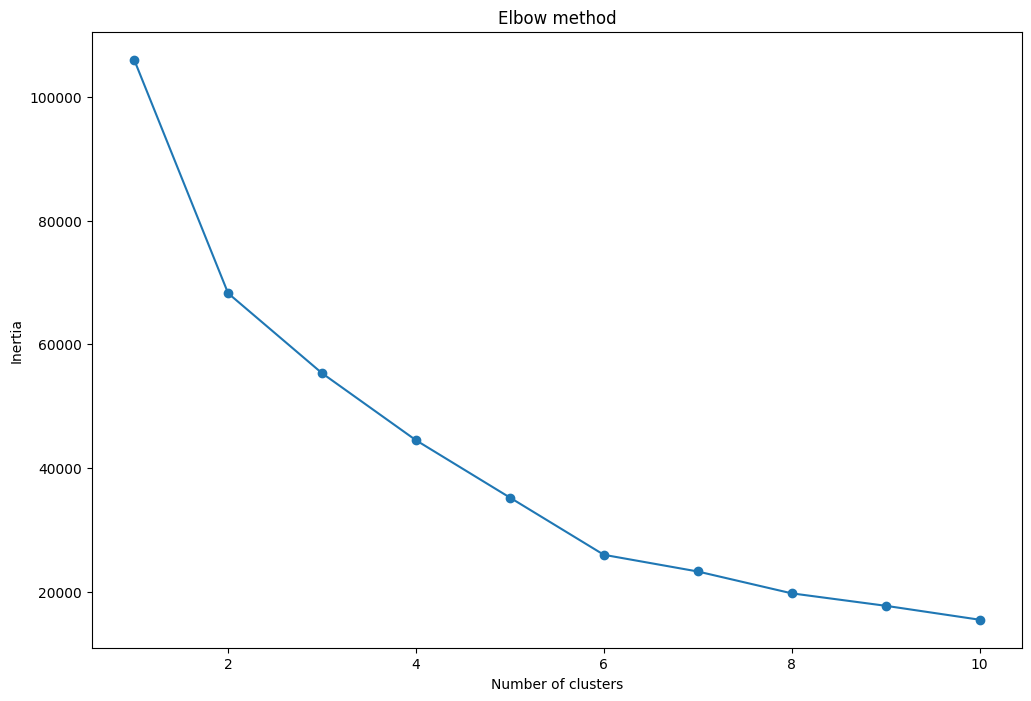

In [87]:
data = X_umap
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [88]:
kmeans_umap = KMeans(n_clusters=6,init='k-means++',random_state=42)

In [89]:
kmeans_umap.fit(X_umap)

KMeans(n_clusters=6, random_state=42)

In [90]:
df_umap_kmeans = energy_scaled.copy()

In [91]:
df_umap_kmeans['kmeans_umap'] = kmeans_umap.labels_

In [92]:
df_umap_kmeans

KWHWTH_EUI  KWHDWH_EUI  KWHLGT_EUI  KWHTVREL_EUI  KWHCFAN_EUI  \
0       -0.518605    2.315230   -0.155420     -0.120420     0.653225   
1       -0.518605    0.922059   -0.103053      0.202698    -0.388270   
2       -0.518605   -0.099273   -0.356057     -0.775772    -0.585286   
3       -0.518605    0.051404   -0.364475      0.284224     0.845861   
4       -0.518605   -0.383855   -0.447789     -0.310388     1.198181   
...           ...         ...         ...           ...          ...   
12314    0.002562   -0.049646    0.423743     -0.274070     1.261119   
12315   -0.414364   -0.737315   -0.723795     -0.731097    -0.613026   
12316   -0.518605   -0.841286   -0.690932     -0.744420    -0.601602   
12317   -0.124951   -0.607265   -0.511546     -0.746864    -0.242523   
12318    0.111607   -0.001133   -0.404469     -0.178020    -0.135098   

       KWHDHUM_EUI  KWHHUM_EUI  KWHEVCHRG_EUI  KWHPLPMP_TOTAL_EUI  \
0        -0.335988   -0.332036      -0.088994           -0.263616   
1        -0.335988   -0.332036      -0.088994           -0.263616   
2        -0.335988   -0.332036      -0.088994           -0.263616   
3        -0.335988   -0.332036      -0.088994           -0.263616   
4        -0.335988    0.365912      -0.088994           -0.263616   
...            ...         ...            ...                 ...   
12314    -0.335988   -0.332036      -0.088994            1.248592   
12315    -0.068313   -0.332036      -0.088994           -0.263616   
12316    -0.003041   -0.332036      -0.088994           -0.263616   
12317    -0.335988   -0.332036      -0.088994           -0.263616   
12318    -0.145228   -0.210347      -0.088994           -0.263616   

       KWHCW_TOTAL_EUI  KWHCOK_TOTAL_EUI  KWHRFG_TOTAL_EUI  KWHOTH_TOTAL_EUI  \
0             2.468177          0.025226          0.501495          0.114688   
1            -0.081205          0.285323         -0.372616         -0.594208   
2            -0.759073          0.644382         -0.728603         -0.685620   
3             0.178380          0.458547         -0.653975         -0.290444   
4            -0.500705         -0.515152          0.414273         -0.159052   
...                ...               ...               ...               ...   
12314         0.070312          0.038656          0.309472         -0.106078   
12315        -0.752164         -0.737050         -1.275782         -1.009332   
12316        -0.608972         -0.497817         -0.969270         -0.901175   
12317        -0.641349         -0.592642          0.207987          0.149904   
12318        -0.146195          0.225969         -0.139171         -0.625542   

       KWHSPH_TOTAL_EUI  KWHCOL_TOTAL_EUI  kmeans_umap  
0             -0.451513          0.390188            5  
1              0.417658         -0.329103            4  
2             -0.529009          0.364396            1  
3              0.545950          0.974712            5  
4             -0.480799          0.272112            4  
...                 ...               ...          ...  
12314         -0.541066          0.377318            3  
12315         -0.352305         -0.869413            1  
12316         -0.250082         -0.701802            1  
12317         -0.242909          0.656418            4  
12318          2.617870          0.422701            0  

[12319 rows x 16 columns]

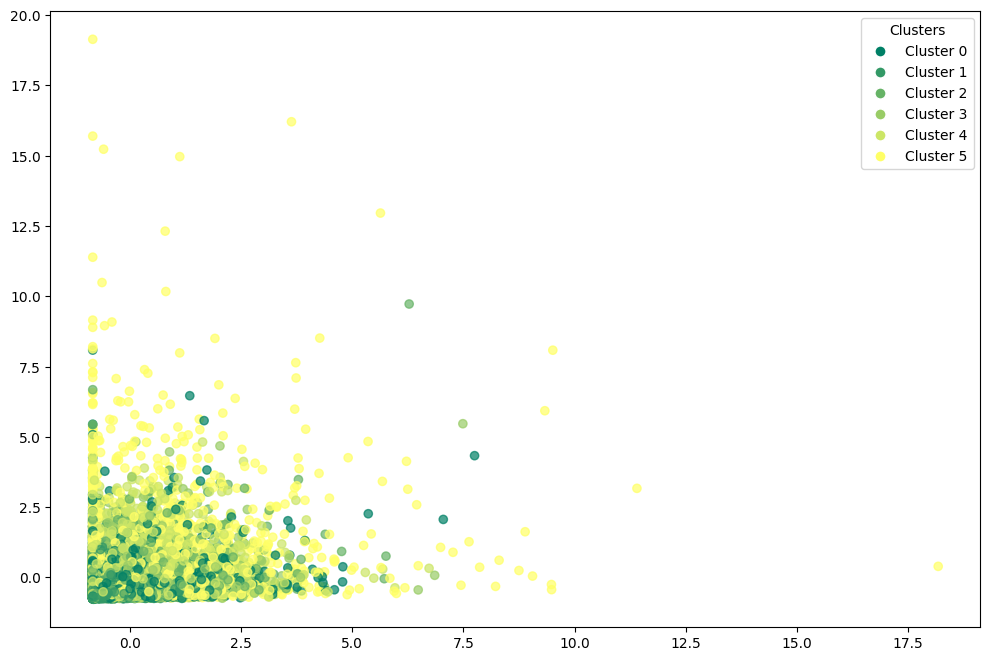

In [93]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_umap_kmeans.iloc[:, 1], df_umap_kmeans.iloc[:, 2], 
                      c=df_umap_kmeans['kmeans_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_kmeans['kmeans_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [94]:
sil = silhouette_score(df_umap_kmeans.iloc[:,:-1], df_umap_kmeans['kmeans_umap'])
ch = calinski_harabasz_score(df_umap_kmeans.iloc[:,:-1], df_umap_kmeans['kmeans_umap'])
db = davies_bouldin_score(df_umap_kmeans.iloc[:,:-1], df_umap_kmeans['kmeans_umap'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: -0.02275241183249712
Calinski-Harabasz: 651.8463816270706
Davies-Bouldin: 2.407423854492609


## Birch

In [95]:
birch = Birch(branching_factor=50,n_clusters=5,threshold=1.5) 

In [96]:
birch.fit(energy_scaled)

Birch(n_clusters=5, threshold=1.5)

In [97]:
df_birch = energy_scaled.copy()

In [98]:
df_birch['birch'] = birch.labels_

In [99]:
df_birch

KWHWTH_EUI  KWHDWH_EUI  KWHLGT_EUI  KWHTVREL_EUI  KWHCFAN_EUI  \
0       -0.518605    2.315230   -0.155420     -0.120420     0.653225   
1       -0.518605    0.922059   -0.103053      0.202698    -0.388270   
2       -0.518605   -0.099273   -0.356057     -0.775772    -0.585286   
3       -0.518605    0.051404   -0.364475      0.284224     0.845861   
4       -0.518605   -0.383855   -0.447789     -0.310388     1.198181   
...           ...         ...         ...           ...          ...   
12314    0.002562   -0.049646    0.423743     -0.274070     1.261119   
12315   -0.414364   -0.737315   -0.723795     -0.731097    -0.613026   
12316   -0.518605   -0.841286   -0.690932     -0.744420    -0.601602   
12317   -0.124951   -0.607265   -0.511546     -0.746864    -0.242523   
12318    0.111607   -0.001133   -0.404469     -0.178020    -0.135098   

       KWHDHUM_EUI  KWHHUM_EUI  KWHEVCHRG_EUI  KWHPLPMP_TOTAL_EUI  \
0        -0.335988   -0.332036      -0.088994           -0.263616   
1        -0.335988   -0.332036      -0.088994           -0.263616   
2        -0.335988   -0.332036      -0.088994           -0.263616   
3        -0.335988   -0.332036      -0.088994           -0.263616   
4        -0.335988    0.365912      -0.088994           -0.263616   
...            ...         ...            ...                 ...   
12314    -0.335988   -0.332036      -0.088994            1.248592   
12315    -0.068313   -0.332036      -0.088994           -0.263616   
12316    -0.003041   -0.332036      -0.088994           -0.263616   
12317    -0.335988   -0.332036      -0.088994           -0.263616   
12318    -0.145228   -0.210347      -0.088994           -0.263616   

       KWHCW_TOTAL_EUI  KWHCOK_TOTAL_EUI  KWHRFG_TOTAL_EUI  KWHOTH_TOTAL_EUI  \
0             2.468177          0.025226          0.501495          0.114688   
1            -0.081205          0.285323         -0.372616         -0.594208   
2            -0.759073          0.644382         -0.728603         -0.685620   
3             0.178380          0.458547         -0.653975         -0.290444   
4            -0.500705         -0.515152          0.414273         -0.159052   
...                ...               ...               ...               ...   
12314         0.070312          0.038656          0.309472         -0.106078   
12315        -0.752164         -0.737050         -1.275782         -1.009332   
12316        -0.608972         -0.497817         -0.969270         -0.901175   
12317        -0.641349         -0.592642          0.207987          0.149904   
12318        -0.146195          0.225969         -0.139171         -0.625542   

       KWHSPH_TOTAL_EUI  KWHCOL_TOTAL_EUI  birch  
0             -0.451513          0.390188      0  
1              0.417658         -0.329103      0  
2             -0.529009          0.364396      0  
3              0.545950          0.974712      0  
4             -0.480799          0.272112      0  
...                 ...               ...    ...  
12314         -0.541066          0.377318      4  
12315         -0.352305         -0.869413      0  
12316         -0.250082         -0.701802      0  
12317         -0.242909          0.656418      0  
12318          2.617870          0.422701      0  

[12319 rows x 16 columns]

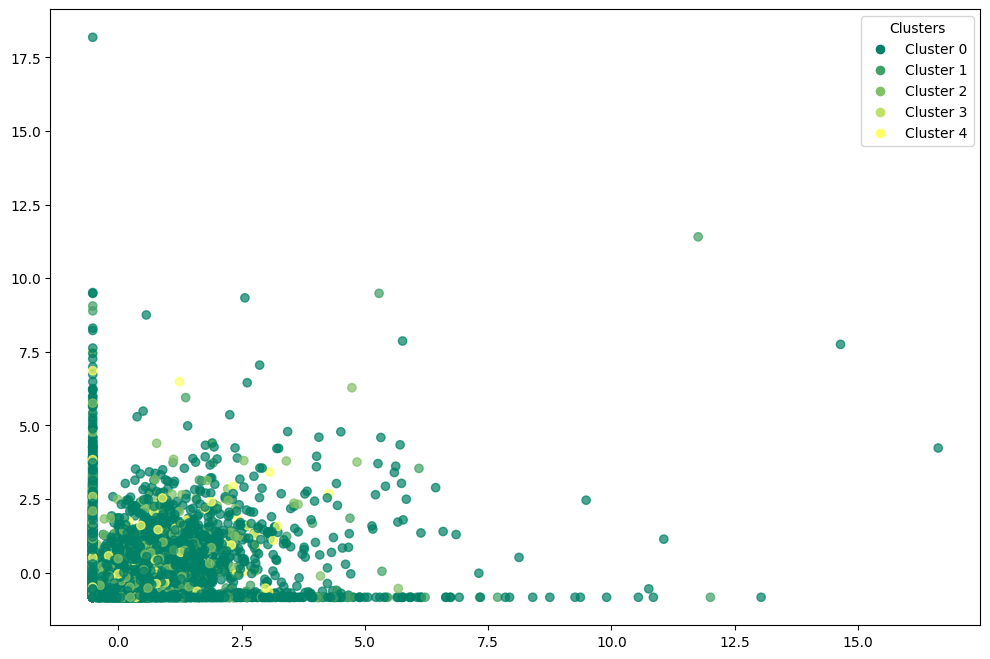

In [100]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_birch.iloc[:, 0], df_birch.iloc[:, 1], 
                      c=df_birch['birch'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_birch['birch'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [101]:
sil = silhouette_score(df_birch.iloc[:,:-1], df_birch['birch'])
ch = calinski_harabasz_score(df_birch.iloc[:,:-1], df_birch['birch'])
db = davies_bouldin_score(df_birch.iloc[:,:-1], df_birch['birch'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.13270325046352463
Calinski-Harabasz: 586.0356347013078
Davies-Bouldin: 1.903351065436659


### Birch with pca

In [102]:
birch_pca = Birch(branching_factor=50,n_clusters=5,threshold=1.5) 

In [103]:
birch_pca.fit(X_pca)

Birch(n_clusters=5, threshold=1.5)

In [104]:
df_pca_birch = energy_scaled.copy()

In [105]:
df_pca_birch["birch_pca"] = birch_pca.labels_

In [106]:
df_pca_birch

KWHWTH_EUI  KWHDWH_EUI  KWHLGT_EUI  KWHTVREL_EUI  KWHCFAN_EUI  \
0       -0.518605    2.315230   -0.155420     -0.120420     0.653225   
1       -0.518605    0.922059   -0.103053      0.202698    -0.388270   
2       -0.518605   -0.099273   -0.356057     -0.775772    -0.585286   
3       -0.518605    0.051404   -0.364475      0.284224     0.845861   
4       -0.518605   -0.383855   -0.447789     -0.310388     1.198181   
...           ...         ...         ...           ...          ...   
12314    0.002562   -0.049646    0.423743     -0.274070     1.261119   
12315   -0.414364   -0.737315   -0.723795     -0.731097    -0.613026   
12316   -0.518605   -0.841286   -0.690932     -0.744420    -0.601602   
12317   -0.124951   -0.607265   -0.511546     -0.746864    -0.242523   
12318    0.111607   -0.001133   -0.404469     -0.178020    -0.135098   

       KWHDHUM_EUI  KWHHUM_EUI  KWHEVCHRG_EUI  KWHPLPMP_TOTAL_EUI  \
0        -0.335988   -0.332036      -0.088994           -0.263616   
1        -0.335988   -0.332036      -0.088994           -0.263616   
2        -0.335988   -0.332036      -0.088994           -0.263616   
3        -0.335988   -0.332036      -0.088994           -0.263616   
4        -0.335988    0.365912      -0.088994           -0.263616   
...            ...         ...            ...                 ...   
12314    -0.335988   -0.332036      -0.088994            1.248592   
12315    -0.068313   -0.332036      -0.088994           -0.263616   
12316    -0.003041   -0.332036      -0.088994           -0.263616   
12317    -0.335988   -0.332036      -0.088994           -0.263616   
12318    -0.145228   -0.210347      -0.088994           -0.263616   

       KWHCW_TOTAL_EUI  KWHCOK_TOTAL_EUI  KWHRFG_TOTAL_EUI  KWHOTH_TOTAL_EUI  \
0             2.468177          0.025226          0.501495          0.114688   
1            -0.081205          0.285323         -0.372616         -0.594208   
2            -0.759073          0.644382         -0.728603         -0.685620   
3             0.178380          0.458547         -0.653975         -0.290444   
4            -0.500705         -0.515152          0.414273         -0.159052   
...                ...               ...               ...               ...   
12314         0.070312          0.038656          0.309472         -0.106078   
12315        -0.752164         -0.737050         -1.275782         -1.009332   
12316        -0.608972         -0.497817         -0.969270         -0.901175   
12317        -0.641349         -0.592642          0.207987          0.149904   
12318        -0.146195          0.225969         -0.139171         -0.625542   

       KWHSPH_TOTAL_EUI  KWHCOL_TOTAL_EUI  birch_pca  
0             -0.451513          0.390188          2  
1              0.417658         -0.329103          2  
2             -0.529009          0.364396          2  
3              0.545950          0.974712          2  
4             -0.480799          0.272112          2  
...                 ...               ...        ...  
12314         -0.541066          0.377318          2  
12315         -0.352305         -0.869413          2  
12316         -0.250082         -0.701802          2  
12317         -0.242909          0.656418          2  
12318          2.617870          0.422701          2  

[12319 rows x 16 columns]

In [107]:
sil = silhouette_score(df_pca_birch.iloc[:,:-1], df_pca_birch['birch_pca'])
ch = calinski_harabasz_score(df_pca_birch.iloc[:,:-1], df_pca_birch['birch_pca'])
db = davies_bouldin_score(df_pca_birch.iloc[:,:-1], df_pca_birch['birch_pca'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.5534579771974001
Calinski-Harabasz: 688.6499285670241
Davies-Bouldin: 1.3120249434503048


### Birch with t-SNE

In [108]:
birch_tsne = Birch(branching_factor=50,n_clusters=5,threshold=1.5) 

In [109]:
birch_tsne.fit(X_tsne)

Birch(n_clusters=5, threshold=1.5)

In [110]:
df_tsne_birch = energy_scaled.copy()

In [111]:
df_tsne_birch['birch_tsne'] = birch_tsne.labels_

In [112]:
df_tsne_birch

KWHWTH_EUI  KWHDWH_EUI  KWHLGT_EUI  KWHTVREL_EUI  KWHCFAN_EUI  \
0       -0.518605    2.315230   -0.155420     -0.120420     0.653225   
1       -0.518605    0.922059   -0.103053      0.202698    -0.388270   
2       -0.518605   -0.099273   -0.356057     -0.775772    -0.585286   
3       -0.518605    0.051404   -0.364475      0.284224     0.845861   
4       -0.518605   -0.383855   -0.447789     -0.310388     1.198181   
...           ...         ...         ...           ...          ...   
12314    0.002562   -0.049646    0.423743     -0.274070     1.261119   
12315   -0.414364   -0.737315   -0.723795     -0.731097    -0.613026   
12316   -0.518605   -0.841286   -0.690932     -0.744420    -0.601602   
12317   -0.124951   -0.607265   -0.511546     -0.746864    -0.242523   
12318    0.111607   -0.001133   -0.404469     -0.178020    -0.135098   

       KWHDHUM_EUI  KWHHUM_EUI  KWHEVCHRG_EUI  KWHPLPMP_TOTAL_EUI  \
0        -0.335988   -0.332036      -0.088994           -0.263616   
1        -0.335988   -0.332036      -0.088994           -0.263616   
2        -0.335988   -0.332036      -0.088994           -0.263616   
3        -0.335988   -0.332036      -0.088994           -0.263616   
4        -0.335988    0.365912      -0.088994           -0.263616   
...            ...         ...            ...                 ...   
12314    -0.335988   -0.332036      -0.088994            1.248592   
12315    -0.068313   -0.332036      -0.088994           -0.263616   
12316    -0.003041   -0.332036      -0.088994           -0.263616   
12317    -0.335988   -0.332036      -0.088994           -0.263616   
12318    -0.145228   -0.210347      -0.088994           -0.263616   

       KWHCW_TOTAL_EUI  KWHCOK_TOTAL_EUI  KWHRFG_TOTAL_EUI  KWHOTH_TOTAL_EUI  \
0             2.468177          0.025226          0.501495          0.114688   
1            -0.081205          0.285323         -0.372616         -0.594208   
2            -0.759073          0.644382         -0.728603         -0.685620   
3             0.178380          0.458547         -0.653975         -0.290444   
4            -0.500705         -0.515152          0.414273         -0.159052   
...                ...               ...               ...               ...   
12314         0.070312          0.038656          0.309472         -0.106078   
12315        -0.752164         -0.737050         -1.275782         -1.009332   
12316        -0.608972         -0.497817         -0.969270         -0.901175   
12317        -0.641349         -0.592642          0.207987          0.149904   
12318        -0.146195          0.225969         -0.139171         -0.625542   

       KWHSPH_TOTAL_EUI  KWHCOL_TOTAL_EUI  birch_tsne  
0             -0.451513          0.390188           0  
1              0.417658         -0.329103           0  
2             -0.529009          0.364396           0  
3              0.545950          0.974712           2  
4             -0.480799          0.272112           1  
...                 ...               ...         ...  
12314         -0.541066          0.377318           1  
12315         -0.352305         -0.869413           3  
12316         -0.250082         -0.701802           4  
12317         -0.242909          0.656418           1  
12318          2.617870          0.422701           2  

[12319 rows x 16 columns]

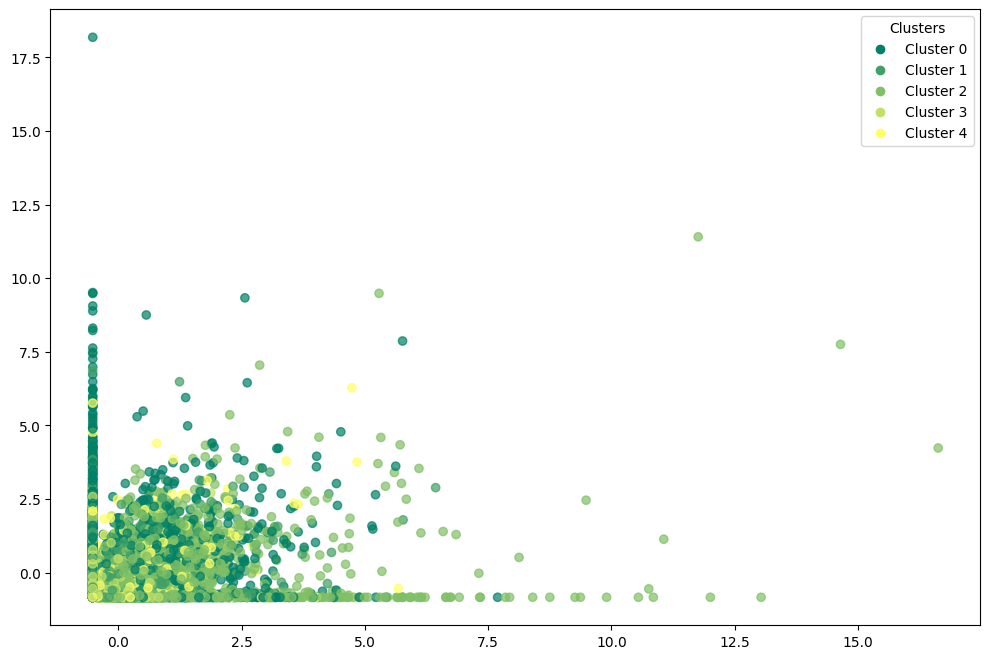

In [113]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_tsne_birch.iloc[:, 0], df_tsne_birch.iloc[:, 1], 
                      c=df_tsne_birch['birch_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_birch['birch_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [114]:
sil = silhouette_score(df_tsne_birch.iloc[:,:-1], df_tsne_birch['birch_tsne'])
ch = calinski_harabasz_score(df_tsne_birch.iloc[:,:-1], df_tsne_birch['birch_tsne'])
db = davies_bouldin_score(df_tsne_birch.iloc[:,:-1], df_tsne_birch['birch_tsne'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: -0.02842940043509069
Calinski-Harabasz: 494.61697731359374
Davies-Bouldin: 2.994676050049191


### Birch with umap

In [115]:
birch_umap = Birch(branching_factor=50,n_clusters=5,threshold=1.5) 

In [116]:
birch_umap.fit(X_umap)

Birch(n_clusters=5, threshold=1.5)

In [117]:
df_umap_birch = energy_scaled.copy()

In [118]:
df_umap_birch['birch_umap'] = birch_umap.labels_

In [119]:
df_umap_birch

KWHWTH_EUI  KWHDWH_EUI  KWHLGT_EUI  KWHTVREL_EUI  KWHCFAN_EUI  \
0       -0.518605    2.315230   -0.155420     -0.120420     0.653225   
1       -0.518605    0.922059   -0.103053      0.202698    -0.388270   
2       -0.518605   -0.099273   -0.356057     -0.775772    -0.585286   
3       -0.518605    0.051404   -0.364475      0.284224     0.845861   
4       -0.518605   -0.383855   -0.447789     -0.310388     1.198181   
...           ...         ...         ...           ...          ...   
12314    0.002562   -0.049646    0.423743     -0.274070     1.261119   
12315   -0.414364   -0.737315   -0.723795     -0.731097    -0.613026   
12316   -0.518605   -0.841286   -0.690932     -0.744420    -0.601602   
12317   -0.124951   -0.607265   -0.511546     -0.746864    -0.242523   
12318    0.111607   -0.001133   -0.404469     -0.178020    -0.135098   

       KWHDHUM_EUI  KWHHUM_EUI  KWHEVCHRG_EUI  KWHPLPMP_TOTAL_EUI  \
0        -0.335988   -0.332036      -0.088994           -0.263616   
1        -0.335988   -0.332036      -0.088994           -0.263616   
2        -0.335988   -0.332036      -0.088994           -0.263616   
3        -0.335988   -0.332036      -0.088994           -0.263616   
4        -0.335988    0.365912      -0.088994           -0.263616   
...            ...         ...            ...                 ...   
12314    -0.335988   -0.332036      -0.088994            1.248592   
12315    -0.068313   -0.332036      -0.088994           -0.263616   
12316    -0.003041   -0.332036      -0.088994           -0.263616   
12317    -0.335988   -0.332036      -0.088994           -0.263616   
12318    -0.145228   -0.210347      -0.088994           -0.263616   

       KWHCW_TOTAL_EUI  KWHCOK_TOTAL_EUI  KWHRFG_TOTAL_EUI  KWHOTH_TOTAL_EUI  \
0             2.468177          0.025226          0.501495          0.114688   
1            -0.081205          0.285323         -0.372616         -0.594208   
2            -0.759073          0.644382         -0.728603         -0.685620   
3             0.178380          0.458547         -0.653975         -0.290444   
4            -0.500705         -0.515152          0.414273         -0.159052   
...                ...               ...               ...               ...   
12314         0.070312          0.038656          0.309472         -0.106078   
12315        -0.752164         -0.737050         -1.275782         -1.009332   
12316        -0.608972         -0.497817         -0.969270         -0.901175   
12317        -0.641349         -0.592642          0.207987          0.149904   
12318        -0.146195          0.225969         -0.139171         -0.625542   

       KWHSPH_TOTAL_EUI  KWHCOL_TOTAL_EUI  birch_umap  
0             -0.451513          0.390188           2  
1              0.417658         -0.329103           1  
2             -0.529009          0.364396           1  
3              0.545950          0.974712           2  
4             -0.480799          0.272112           2  
...                 ...               ...         ...  
12314         -0.541066          0.377318           3  
12315         -0.352305         -0.869413           0  
12316         -0.250082         -0.701802           0  
12317         -0.242909          0.656418           2  
12318          2.617870          0.422701           1  

[12319 rows x 16 columns]

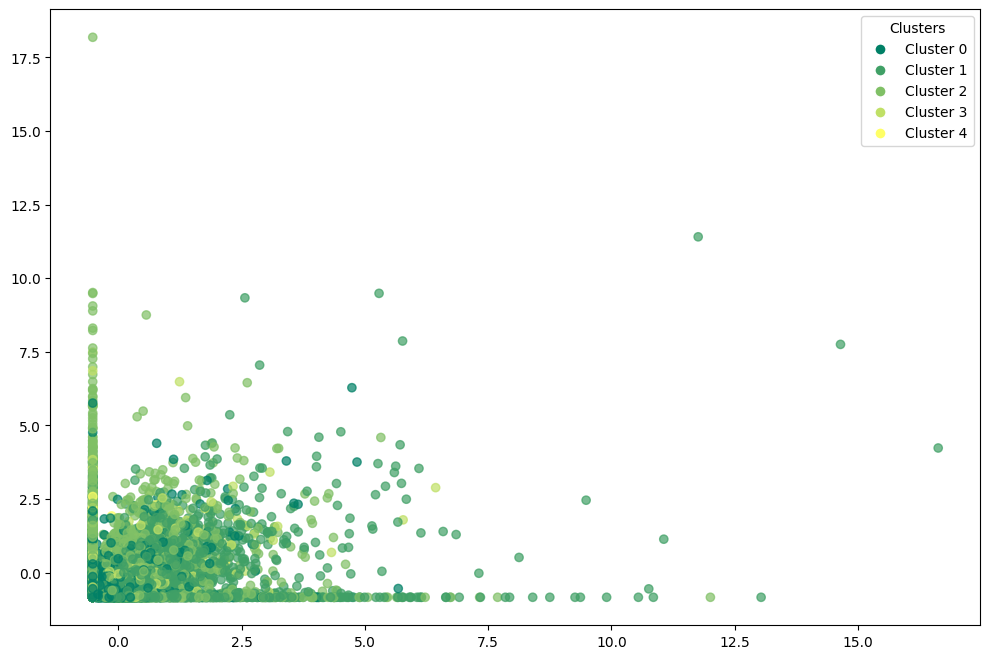

In [120]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_umap_birch.iloc[:, 0], df_umap_birch.iloc[:, 1], 
                      c=df_umap_birch['birch_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_birch['birch_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [121]:
sil = silhouette_score(df_umap_birch.iloc[:,:-1], df_umap_birch['birch_umap'])
ch = calinski_harabasz_score(df_umap_birch.iloc[:,:-1], df_umap_birch['birch_umap'])
db = davies_bouldin_score(df_umap_birch.iloc[:,:-1], df_umap_birch['birch_umap'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.04402363015419304
Calinski-Harabasz: 627.8364103422209
Davies-Bouldin: 2.362341251943401


## GMM - Gaussian Mixture Models

In [122]:
gmm = GaussianMixture(n_components=5,init_params='k-means++',random_state=42)

In [123]:
gmm.fit(energy_scaled)

GaussianMixture(init_params='k-means++', n_components=5, random_state=42)

In [124]:
df_gmm = energy_scaled.copy()

In [125]:
df_gmm['gmm'] = gmm.predict(energy_scaled)

In [126]:
df_gmm

KWHWTH_EUI  KWHDWH_EUI  KWHLGT_EUI  KWHTVREL_EUI  KWHCFAN_EUI  \
0       -0.518605    2.315230   -0.155420     -0.120420     0.653225   
1       -0.518605    0.922059   -0.103053      0.202698    -0.388270   
2       -0.518605   -0.099273   -0.356057     -0.775772    -0.585286   
3       -0.518605    0.051404   -0.364475      0.284224     0.845861   
4       -0.518605   -0.383855   -0.447789     -0.310388     1.198181   
...           ...         ...         ...           ...          ...   
12314    0.002562   -0.049646    0.423743     -0.274070     1.261119   
12315   -0.414364   -0.737315   -0.723795     -0.731097    -0.613026   
12316   -0.518605   -0.841286   -0.690932     -0.744420    -0.601602   
12317   -0.124951   -0.607265   -0.511546     -0.746864    -0.242523   
12318    0.111607   -0.001133   -0.404469     -0.178020    -0.135098   

       KWHDHUM_EUI  KWHHUM_EUI  KWHEVCHRG_EUI  KWHPLPMP_TOTAL_EUI  \
0        -0.335988   -0.332036      -0.088994           -0.263616   
1        -0.335988   -0.332036      -0.088994           -0.263616   
2        -0.335988   -0.332036      -0.088994           -0.263616   
3        -0.335988   -0.332036      -0.088994           -0.263616   
4        -0.335988    0.365912      -0.088994           -0.263616   
...            ...         ...            ...                 ...   
12314    -0.335988   -0.332036      -0.088994            1.248592   
12315    -0.068313   -0.332036      -0.088994           -0.263616   
12316    -0.003041   -0.332036      -0.088994           -0.263616   
12317    -0.335988   -0.332036      -0.088994           -0.263616   
12318    -0.145228   -0.210347      -0.088994           -0.263616   

       KWHCW_TOTAL_EUI  KWHCOK_TOTAL_EUI  KWHRFG_TOTAL_EUI  KWHOTH_TOTAL_EUI  \
0             2.468177          0.025226          0.501495          0.114688   
1            -0.081205          0.285323         -0.372616         -0.594208   
2            -0.759073          0.644382         -0.728603         -0.685620   
3             0.178380          0.458547         -0.653975         -0.290444   
4            -0.500705         -0.515152          0.414273         -0.159052   
...                ...               ...               ...               ...   
12314         0.070312          0.038656          0.309472         -0.106078   
12315        -0.752164         -0.737050         -1.275782         -1.009332   
12316        -0.608972         -0.497817         -0.969270         -0.901175   
12317        -0.641349         -0.592642          0.207987          0.149904   
12318        -0.146195          0.225969         -0.139171         -0.625542   

       KWHSPH_TOTAL_EUI  KWHCOL_TOTAL_EUI  gmm  
0             -0.451513          0.390188    1  
1              0.417658         -0.329103    1  
2             -0.529009          0.364396    1  
3              0.545950          0.974712    1  
4             -0.480799          0.272112    3  
...                 ...               ...  ...  
12314         -0.541066          0.377318    0  
12315         -0.352305         -0.869413    3  
12316         -0.250082         -0.701802    3  
12317         -0.242909          0.656418    0  
12318          2.617870          0.422701    3  

[12319 rows x 16 columns]

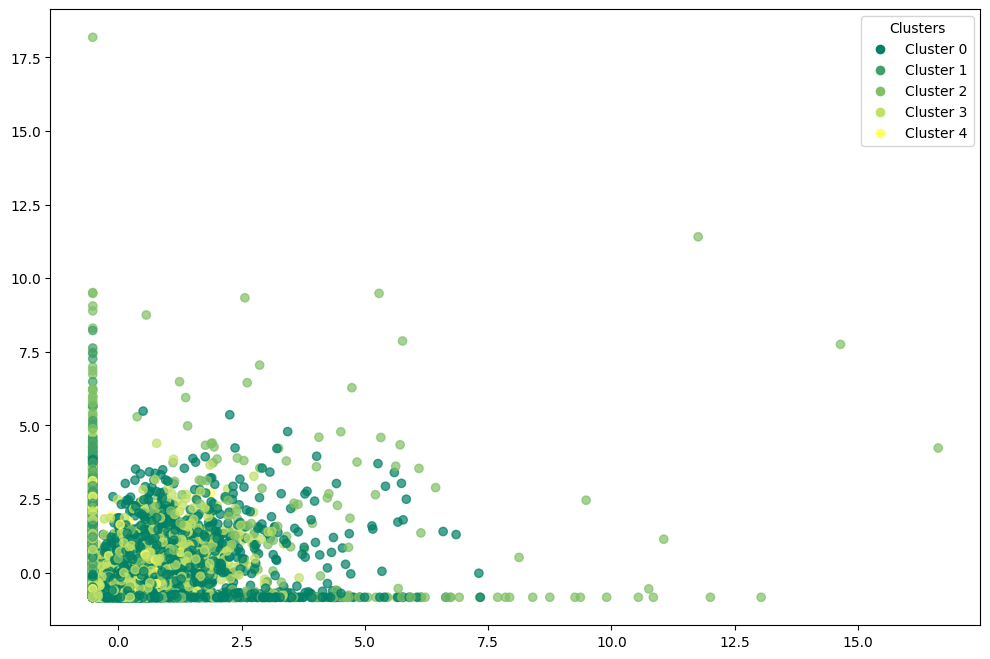

In [127]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_gmm.iloc[:, 0], df_gmm.iloc[:, 1], 
                      c=df_gmm['gmm'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_gmm['gmm'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [128]:
sil = silhouette_score(df_gmm.iloc[:,:-1], df_gmm['gmm'])
ch = calinski_harabasz_score(df_gmm.iloc[:,:-1], df_gmm['gmm'])
db = davies_bouldin_score(df_gmm.iloc[:,:-1], df_gmm['gmm'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: -0.007816872711172157
Calinski-Harabasz: 434.4013010289796
Davies-Bouldin: 3.3944367995810687


### GMM with pca

In [129]:
gmm_pca = GaussianMixture(n_components=5,init_params='k-means++',random_state=42)

In [130]:
gmm_pca.fit(X_pca)

GaussianMixture(init_params='k-means++', n_components=5, random_state=42)

In [131]:
df_pca_gmm = energy_scaled.copy()

In [132]:
df_pca_gmm['gmm_pca'] = gmm_pca.predict(X_pca)

In [133]:
df_pca_gmm

KWHWTH_EUI  KWHDWH_EUI  KWHLGT_EUI  KWHTVREL_EUI  KWHCFAN_EUI  \
0       -0.518605    2.315230   -0.155420     -0.120420     0.653225   
1       -0.518605    0.922059   -0.103053      0.202698    -0.388270   
2       -0.518605   -0.099273   -0.356057     -0.775772    -0.585286   
3       -0.518605    0.051404   -0.364475      0.284224     0.845861   
4       -0.518605   -0.383855   -0.447789     -0.310388     1.198181   
...           ...         ...         ...           ...          ...   
12314    0.002562   -0.049646    0.423743     -0.274070     1.261119   
12315   -0.414364   -0.737315   -0.723795     -0.731097    -0.613026   
12316   -0.518605   -0.841286   -0.690932     -0.744420    -0.601602   
12317   -0.124951   -0.607265   -0.511546     -0.746864    -0.242523   
12318    0.111607   -0.001133   -0.404469     -0.178020    -0.135098   

       KWHDHUM_EUI  KWHHUM_EUI  KWHEVCHRG_EUI  KWHPLPMP_TOTAL_EUI  \
0        -0.335988   -0.332036      -0.088994           -0.263616   
1        -0.335988   -0.332036      -0.088994           -0.263616   
2        -0.335988   -0.332036      -0.088994           -0.263616   
3        -0.335988   -0.332036      -0.088994           -0.263616   
4        -0.335988    0.365912      -0.088994           -0.263616   
...            ...         ...            ...                 ...   
12314    -0.335988   -0.332036      -0.088994            1.248592   
12315    -0.068313   -0.332036      -0.088994           -0.263616   
12316    -0.003041   -0.332036      -0.088994           -0.263616   
12317    -0.335988   -0.332036      -0.088994           -0.263616   
12318    -0.145228   -0.210347      -0.088994           -0.263616   

       KWHCW_TOTAL_EUI  KWHCOK_TOTAL_EUI  KWHRFG_TOTAL_EUI  KWHOTH_TOTAL_EUI  \
0             2.468177          0.025226          0.501495          0.114688   
1            -0.081205          0.285323         -0.372616         -0.594208   
2            -0.759073          0.644382         -0.728603         -0.685620   
3             0.178380          0.458547         -0.653975         -0.290444   
4            -0.500705         -0.515152          0.414273         -0.159052   
...                ...               ...               ...               ...   
12314         0.070312          0.038656          0.309472         -0.106078   
12315        -0.752164         -0.737050         -1.275782         -1.009332   
12316        -0.608972         -0.497817         -0.969270         -0.901175   
12317        -0.641349         -0.592642          0.207987          0.149904   
12318        -0.146195          0.225969         -0.139171         -0.625542   

       KWHSPH_TOTAL_EUI  KWHCOL_TOTAL_EUI  gmm_pca  
0             -0.451513          0.390188        2  
1              0.417658         -0.329103        0  
2             -0.529009          0.364396        1  
3              0.545950          0.974712        0  
4             -0.480799          0.272112        2  
...                 ...               ...      ...  
12314         -0.541066          0.377318        2  
12315         -0.352305         -0.869413        1  
12316         -0.250082         -0.701802        1  
12317         -0.242909          0.656418        0  
12318          2.617870          0.422701        0  

[12319 rows x 16 columns]

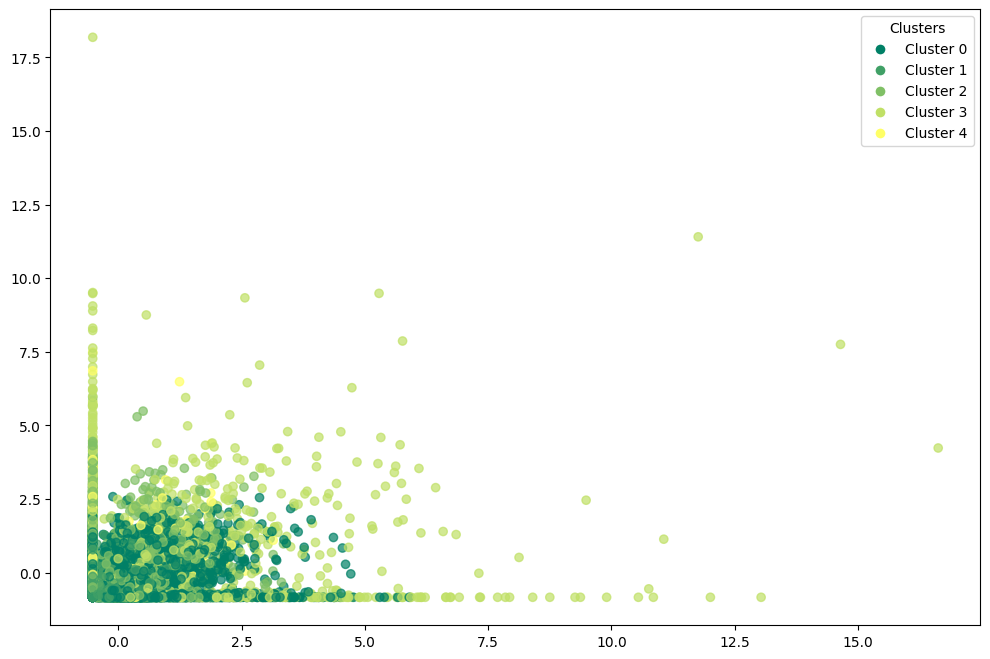

In [134]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pca_gmm.iloc[:, 0], df_pca_gmm.iloc[:, 1], 
                      c=df_pca_gmm['gmm_pca'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_pca_gmm['gmm_pca'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [135]:
sil = silhouette_score(df_pca_gmm.iloc[:,:-1], df_pca_gmm['gmm_pca'])
ch = calinski_harabasz_score(df_pca_gmm.iloc[:,:-1], df_pca_gmm['gmm_pca'])
db = davies_bouldin_score(df_pca_gmm.iloc[:,:-1], df_pca_gmm['gmm_pca'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.016299335468064405
Calinski-Harabasz: 670.9334979953813
Davies-Bouldin: 3.609532612416796


### GMM with t-SNE

In [136]:
gmm_tsne = GaussianMixture(n_components=5,init_params='k-means++',random_state=42)

In [137]:
gmm_tsne.fit(X_tsne)

GaussianMixture(init_params='k-means++', n_components=5, random_state=42)

In [138]:
df_tsne_gmm = energy_scaled.copy()

In [139]:
df_tsne_gmm['gmm_tsne'] = gmm_tsne.predict(X_tsne)

In [140]:
df_tsne_gmm

KWHWTH_EUI  KWHDWH_EUI  KWHLGT_EUI  KWHTVREL_EUI  KWHCFAN_EUI  \
0       -0.518605    2.315230   -0.155420     -0.120420     0.653225   
1       -0.518605    0.922059   -0.103053      0.202698    -0.388270   
2       -0.518605   -0.099273   -0.356057     -0.775772    -0.585286   
3       -0.518605    0.051404   -0.364475      0.284224     0.845861   
4       -0.518605   -0.383855   -0.447789     -0.310388     1.198181   
...           ...         ...         ...           ...          ...   
12314    0.002562   -0.049646    0.423743     -0.274070     1.261119   
12315   -0.414364   -0.737315   -0.723795     -0.731097    -0.613026   
12316   -0.518605   -0.841286   -0.690932     -0.744420    -0.601602   
12317   -0.124951   -0.607265   -0.511546     -0.746864    -0.242523   
12318    0.111607   -0.001133   -0.404469     -0.178020    -0.135098   

       KWHDHUM_EUI  KWHHUM_EUI  KWHEVCHRG_EUI  KWHPLPMP_TOTAL_EUI  \
0        -0.335988   -0.332036      -0.088994           -0.263616   
1        -0.335988   -0.332036      -0.088994           -0.263616   
2        -0.335988   -0.332036      -0.088994           -0.263616   
3        -0.335988   -0.332036      -0.088994           -0.263616   
4        -0.335988    0.365912      -0.088994           -0.263616   
...            ...         ...            ...                 ...   
12314    -0.335988   -0.332036      -0.088994            1.248592   
12315    -0.068313   -0.332036      -0.088994           -0.263616   
12316    -0.003041   -0.332036      -0.088994           -0.263616   
12317    -0.335988   -0.332036      -0.088994           -0.263616   
12318    -0.145228   -0.210347      -0.088994           -0.263616   

       KWHCW_TOTAL_EUI  KWHCOK_TOTAL_EUI  KWHRFG_TOTAL_EUI  KWHOTH_TOTAL_EUI  \
0             2.468177          0.025226          0.501495          0.114688   
1            -0.081205          0.285323         -0.372616         -0.594208   
2            -0.759073          0.644382         -0.728603         -0.685620   
3             0.178380          0.458547         -0.653975         -0.290444   
4            -0.500705         -0.515152          0.414273         -0.159052   
...                ...               ...               ...               ...   
12314         0.070312          0.038656          0.309472         -0.106078   
12315        -0.752164         -0.737050         -1.275782         -1.009332   
12316        -0.608972         -0.497817         -0.969270         -0.901175   
12317        -0.641349         -0.592642          0.207987          0.149904   
12318        -0.146195          0.225969         -0.139171         -0.625542   

       KWHSPH_TOTAL_EUI  KWHCOL_TOTAL_EUI  gmm_tsne  
0             -0.451513          0.390188         0  
1              0.417658         -0.329103         0  
2             -0.529009          0.364396         0  
3              0.545950          0.974712         2  
4             -0.480799          0.272112         2  
...                 ...               ...       ...  
12314         -0.541066          0.377318         2  
12315         -0.352305         -0.869413         4  
12316         -0.250082         -0.701802         4  
12317         -0.242909          0.656418         2  
12318          2.617870          0.422701         0  

[12319 rows x 16 columns]

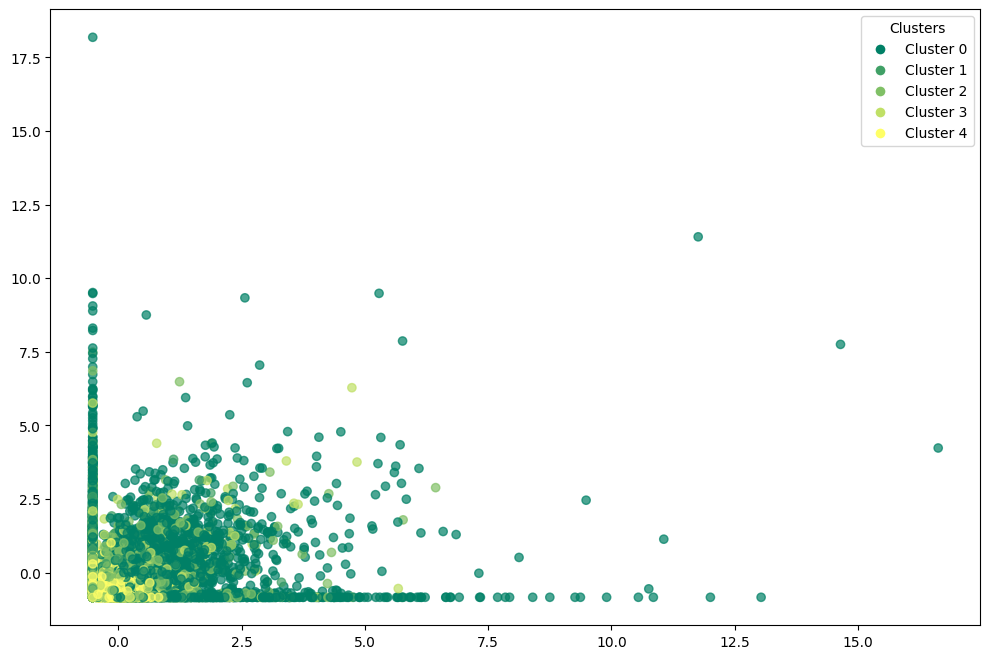

In [141]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_tsne_gmm.iloc[:, 0], df_tsne_gmm.iloc[:, 1], 
                      c=df_tsne_gmm['gmm_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_gmm['gmm_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [142]:
sil = silhouette_score(df_tsne_gmm.iloc[:,:-1], df_tsne_gmm['gmm_tsne'])
ch = calinski_harabasz_score(df_tsne_gmm.iloc[:,:-1], df_tsne_gmm['gmm_tsne'])
db = davies_bouldin_score(df_tsne_gmm.iloc[:,:-1], df_tsne_gmm['gmm_tsne'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: -0.009642614312345671
Calinski-Harabasz: 545.4938597190512
Davies-Bouldin: 2.996093420109747


### GMM with umap

In [143]:
gmm_umap = GaussianMixture(n_components=5,init_params='k-means++',random_state=42)

In [144]:
gmm_umap.fit(X_umap)

GaussianMixture(init_params='k-means++', n_components=5, random_state=42)

In [145]:
df_umap_gmm = energy_scaled.copy()

In [146]:
df_umap_gmm['gmm_umap'] = gmm_umap.predict(X_umap)

In [147]:
df_umap_gmm

KWHWTH_EUI  KWHDWH_EUI  KWHLGT_EUI  KWHTVREL_EUI  KWHCFAN_EUI  \
0       -0.518605    2.315230   -0.155420     -0.120420     0.653225   
1       -0.518605    0.922059   -0.103053      0.202698    -0.388270   
2       -0.518605   -0.099273   -0.356057     -0.775772    -0.585286   
3       -0.518605    0.051404   -0.364475      0.284224     0.845861   
4       -0.518605   -0.383855   -0.447789     -0.310388     1.198181   
...           ...         ...         ...           ...          ...   
12314    0.002562   -0.049646    0.423743     -0.274070     1.261119   
12315   -0.414364   -0.737315   -0.723795     -0.731097    -0.613026   
12316   -0.518605   -0.841286   -0.690932     -0.744420    -0.601602   
12317   -0.124951   -0.607265   -0.511546     -0.746864    -0.242523   
12318    0.111607   -0.001133   -0.404469     -0.178020    -0.135098   

       KWHDHUM_EUI  KWHHUM_EUI  KWHEVCHRG_EUI  KWHPLPMP_TOTAL_EUI  \
0        -0.335988   -0.332036      -0.088994           -0.263616   
1        -0.335988   -0.332036      -0.088994           -0.263616   
2        -0.335988   -0.332036      -0.088994           -0.263616   
3        -0.335988   -0.332036      -0.088994           -0.263616   
4        -0.335988    0.365912      -0.088994           -0.263616   
...            ...         ...            ...                 ...   
12314    -0.335988   -0.332036      -0.088994            1.248592   
12315    -0.068313   -0.332036      -0.088994           -0.263616   
12316    -0.003041   -0.332036      -0.088994           -0.263616   
12317    -0.335988   -0.332036      -0.088994           -0.263616   
12318    -0.145228   -0.210347      -0.088994           -0.263616   

       KWHCW_TOTAL_EUI  KWHCOK_TOTAL_EUI  KWHRFG_TOTAL_EUI  KWHOTH_TOTAL_EUI  \
0             2.468177          0.025226          0.501495          0.114688   
1            -0.081205          0.285323         -0.372616         -0.594208   
2            -0.759073          0.644382         -0.728603         -0.685620   
3             0.178380          0.458547         -0.653975         -0.290444   
4            -0.500705         -0.515152          0.414273         -0.159052   
...                ...               ...               ...               ...   
12314         0.070312          0.038656          0.309472         -0.106078   
12315        -0.752164         -0.737050         -1.275782         -1.009332   
12316        -0.608972         -0.497817         -0.969270         -0.901175   
12317        -0.641349         -0.592642          0.207987          0.149904   
12318        -0.146195          0.225969         -0.139171         -0.625542   

       KWHSPH_TOTAL_EUI  KWHCOL_TOTAL_EUI  gmm_umap  
0             -0.451513          0.390188         0  
1              0.417658         -0.329103         0  
2             -0.529009          0.364396         0  
3              0.545950          0.974712         0  
4             -0.480799          0.272112         4  
...                 ...               ...       ...  
12314         -0.541066          0.377318         3  
12315         -0.352305         -0.869413         1  
12316         -0.250082         -0.701802         1  
12317         -0.242909          0.656418         4  
12318          2.617870          0.422701         0  

[12319 rows x 16 columns]

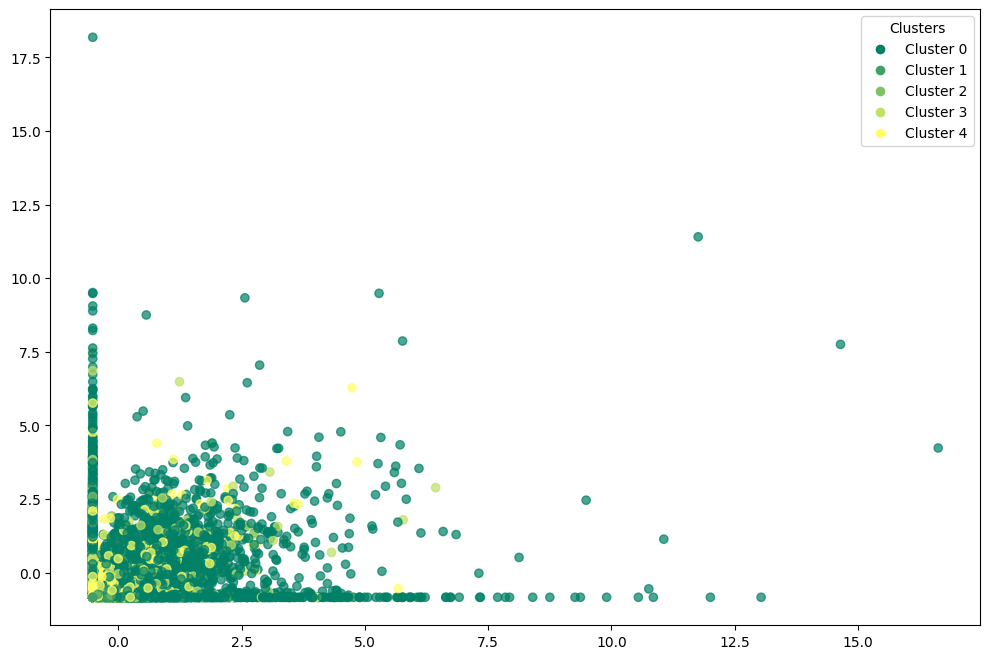

In [148]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_umap_gmm.iloc[:, 0], df_umap_gmm.iloc[:, 1], 
                      c=df_umap_gmm['gmm_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_gmm['gmm_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [149]:
sil = silhouette_score(df_umap_gmm.iloc[:,:-1], df_umap_gmm['gmm_umap'])
ch = calinski_harabasz_score(df_umap_gmm.iloc[:,:-1], df_umap_gmm['gmm_umap'])
db = davies_bouldin_score(df_umap_gmm.iloc[:,:-1], df_umap_gmm['gmm_umap'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: -0.16899489838895587
Calinski-Harabasz: 486.1625170367928
Davies-Bouldin: 2.1851242995900773


## pam

In [150]:
initial_medoids = np.random.choice(len(energy_scaled),5,replace=False)

In [151]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [152]:
pam = kmedoids(energy_scaled.values.tolist(),initial_medoids,metric=metric)

In [153]:
pam.process()

In [154]:
clusters = pam.get_clusters()

In [155]:
medoids = pam.get_medoids()

In [156]:
labels = np.zeros(len(energy_scaled))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [157]:
df_pam = energy_scaled.copy()

In [158]:
df_pam['pam'] = labels

In [159]:
df_pam

KWHWTH_EUI  KWHDWH_EUI  KWHLGT_EUI  KWHTVREL_EUI  KWHCFAN_EUI  \
0       -0.518605    2.315230   -0.155420     -0.120420     0.653225   
1       -0.518605    0.922059   -0.103053      0.202698    -0.388270   
2       -0.518605   -0.099273   -0.356057     -0.775772    -0.585286   
3       -0.518605    0.051404   -0.364475      0.284224     0.845861   
4       -0.518605   -0.383855   -0.447789     -0.310388     1.198181   
...           ...         ...         ...           ...          ...   
12314    0.002562   -0.049646    0.423743     -0.274070     1.261119   
12315   -0.414364   -0.737315   -0.723795     -0.731097    -0.613026   
12316   -0.518605   -0.841286   -0.690932     -0.744420    -0.601602   
12317   -0.124951   -0.607265   -0.511546     -0.746864    -0.242523   
12318    0.111607   -0.001133   -0.404469     -0.178020    -0.135098   

       KWHDHUM_EUI  KWHHUM_EUI  KWHEVCHRG_EUI  KWHPLPMP_TOTAL_EUI  \
0        -0.335988   -0.332036      -0.088994           -0.263616   
1        -0.335988   -0.332036      -0.088994           -0.263616   
2        -0.335988   -0.332036      -0.088994           -0.263616   
3        -0.335988   -0.332036      -0.088994           -0.263616   
4        -0.335988    0.365912      -0.088994           -0.263616   
...            ...         ...            ...                 ...   
12314    -0.335988   -0.332036      -0.088994            1.248592   
12315    -0.068313   -0.332036      -0.088994           -0.263616   
12316    -0.003041   -0.332036      -0.088994           -0.263616   
12317    -0.335988   -0.332036      -0.088994           -0.263616   
12318    -0.145228   -0.210347      -0.088994           -0.263616   

       KWHCW_TOTAL_EUI  KWHCOK_TOTAL_EUI  KWHRFG_TOTAL_EUI  KWHOTH_TOTAL_EUI  \
0             2.468177          0.025226          0.501495          0.114688   
1            -0.081205          0.285323         -0.372616         -0.594208   
2            -0.759073          0.644382         -0.728603         -0.685620   
3             0.178380          0.458547         -0.653975         -0.290444   
4            -0.500705         -0.515152          0.414273         -0.159052   
...                ...               ...               ...               ...   
12314         0.070312          0.038656          0.309472         -0.106078   
12315        -0.752164         -0.737050         -1.275782         -1.009332   
12316        -0.608972         -0.497817         -0.969270         -0.901175   
12317        -0.641349         -0.592642          0.207987          0.149904   
12318        -0.146195          0.225969         -0.139171         -0.625542   

       KWHSPH_TOTAL_EUI  KWHCOL_TOTAL_EUI  pam  
0             -0.451513          0.390188  0.0  
1              0.417658         -0.329103  0.0  
2             -0.529009          0.364396  1.0  
3              0.545950          0.974712  4.0  
4             -0.480799          0.272112  0.0  
...                 ...               ...  ...  
12314         -0.541066          0.377318  4.0  
12315         -0.352305         -0.869413  1.0  
12316         -0.250082         -0.701802  1.0  
12317         -0.242909          0.656418  0.0  
12318          2.617870          0.422701  2.0  

[12319 rows x 16 columns]

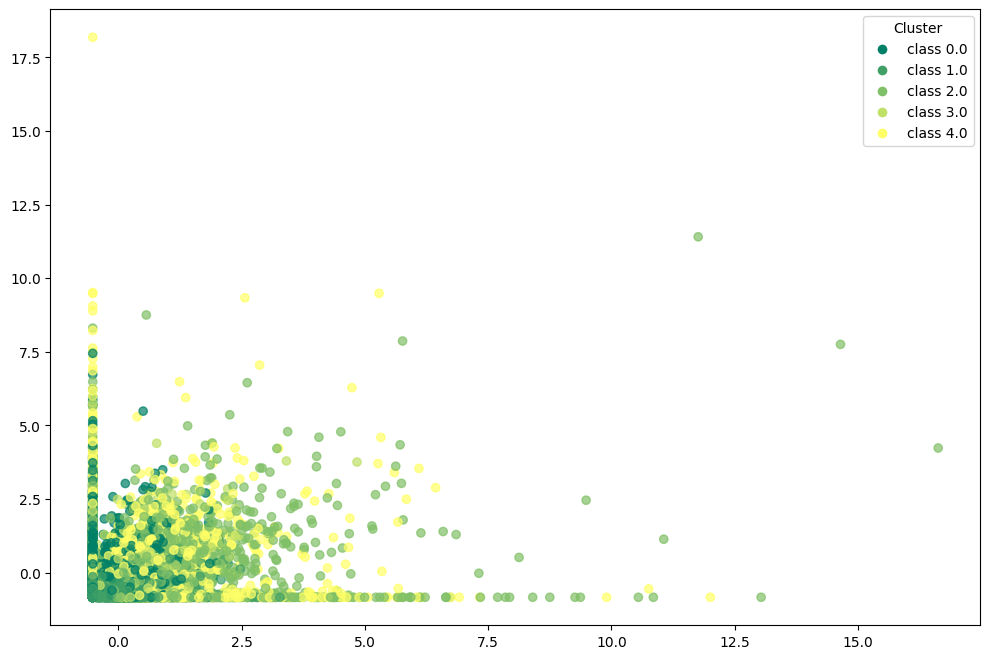

In [160]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pam.iloc[:, 0],df_pam.iloc[:, 1], 
                      c=df_pam['pam'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam['pam'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

In [161]:
sil = silhouette_score(df_pam.iloc[:,:-1], df_pam['pam'])
ch = calinski_harabasz_score(df_pam.iloc[:,:-1], df_pam['pam'])
db = davies_bouldin_score(df_pam.iloc[:,:-1], df_pam['pam'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.0037849825437366066
Calinski-Harabasz: 865.524005884382
Davies-Bouldin: 2.4284341571443475


### pam with pca

In [167]:
initial_medoids = np.random.choice(len(X_pca),5,replace=False)

In [168]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [171]:
pam_pca = kmedoids(X_pca.values.tolist(),initial_medoids,metric=metric)

In [172]:
pam_pca.process()

In [173]:
clusters = pam_pca.get_clusters()

In [174]:
medoids = pam_pca.get_medoids()

In [175]:
labels = np.zeros(len(X_pca))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [176]:
df_pam_pca = energy_scaled.copy()

In [177]:
df_pam_pca['pam_pca'] = labels

In [178]:
df_pam_pca

KWHWTH_EUI  KWHDWH_EUI  KWHLGT_EUI  KWHTVREL_EUI  KWHCFAN_EUI  \
0       -0.518605    2.315230   -0.155420     -0.120420     0.653225   
1       -0.518605    0.922059   -0.103053      0.202698    -0.388270   
2       -0.518605   -0.099273   -0.356057     -0.775772    -0.585286   
3       -0.518605    0.051404   -0.364475      0.284224     0.845861   
4       -0.518605   -0.383855   -0.447789     -0.310388     1.198181   
...           ...         ...         ...           ...          ...   
12314    0.002562   -0.049646    0.423743     -0.274070     1.261119   
12315   -0.414364   -0.737315   -0.723795     -0.731097    -0.613026   
12316   -0.518605   -0.841286   -0.690932     -0.744420    -0.601602   
12317   -0.124951   -0.607265   -0.511546     -0.746864    -0.242523   
12318    0.111607   -0.001133   -0.404469     -0.178020    -0.135098   

       KWHDHUM_EUI  KWHHUM_EUI  KWHEVCHRG_EUI  KWHPLPMP_TOTAL_EUI  \
0        -0.335988   -0.332036      -0.088994           -0.263616   
1        -0.335988   -0.332036      -0.088994           -0.263616   
2        -0.335988   -0.332036      -0.088994           -0.263616   
3        -0.335988   -0.332036      -0.088994           -0.263616   
4        -0.335988    0.365912      -0.088994           -0.263616   
...            ...         ...            ...                 ...   
12314    -0.335988   -0.332036      -0.088994            1.248592   
12315    -0.068313   -0.332036      -0.088994           -0.263616   
12316    -0.003041   -0.332036      -0.088994           -0.263616   
12317    -0.335988   -0.332036      -0.088994           -0.263616   
12318    -0.145228   -0.210347      -0.088994           -0.263616   

       KWHCW_TOTAL_EUI  KWHCOK_TOTAL_EUI  KWHRFG_TOTAL_EUI  KWHOTH_TOTAL_EUI  \
0             2.468177          0.025226          0.501495          0.114688   
1            -0.081205          0.285323         -0.372616         -0.594208   
2            -0.759073          0.644382         -0.728603         -0.685620   
3             0.178380          0.458547         -0.653975         -0.290444   
4            -0.500705         -0.515152          0.414273         -0.159052   
...                ...               ...               ...               ...   
12314         0.070312          0.038656          0.309472         -0.106078   
12315        -0.752164         -0.737050         -1.275782         -1.009332   
12316        -0.608972         -0.497817         -0.969270         -0.901175   
12317        -0.641349         -0.592642          0.207987          0.149904   
12318        -0.146195          0.225969         -0.139171         -0.625542   

       KWHSPH_TOTAL_EUI  KWHCOL_TOTAL_EUI  pam_pca  
0             -0.451513          0.390188      1.0  
1              0.417658         -0.329103      3.0  
2             -0.529009          0.364396      0.0  
3              0.545950          0.974712      3.0  
4             -0.480799          0.272112      3.0  
...                 ...               ...      ...  
12314         -0.541066          0.377318      3.0  
12315         -0.352305         -0.869413      0.0  
12316         -0.250082         -0.701802      0.0  
12317         -0.242909          0.656418      0.0  
12318          2.617870          0.422701      2.0  

[12319 rows x 16 columns]

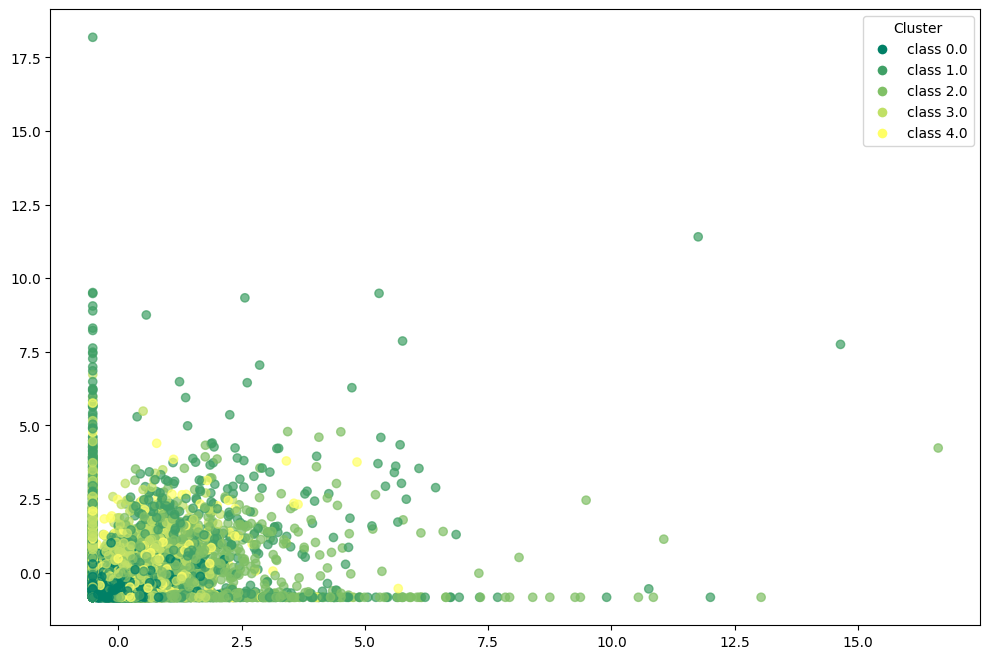

In [179]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pam_pca.iloc[:, 0],df_pam_pca.iloc[:, 1], 
                      c=df_pam_pca['pam_pca'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_pca['pam_pca'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

In [180]:
sil = silhouette_score(df_pam_pca.iloc[:,:-1], df_pam_pca['pam_pca'])
ch = calinski_harabasz_score(df_pam_pca.iloc[:,:-1], df_pam_pca['pam_pca'])
db = davies_bouldin_score(df_pam_pca.iloc[:,:-1], df_pam_pca['pam_pca'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.08516549515846737
Calinski-Harabasz: 979.5302032200856
Davies-Bouldin: 2.3188687014233293


### pam with t-SNE

In [181]:
initial_medoids = np.random.choice(len(X_tsne),5,replace=False)

In [182]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [183]:
pam_tsne = kmedoids(X_tsne.values.tolist(),initial_medoids,metric=metric)

In [184]:
pam_tsne.process()

In [185]:
clusters = pam_tsne.get_clusters()

In [186]:
medoids = pam_tsne.get_medoids()

In [187]:
labels = np.zeros(len(X_tsne))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [188]:
df_pam_tsne = energy_scaled.copy()

In [189]:
df_pam_tsne['pam_tsne'] = labels

In [190]:
df_pam_tsne

KWHWTH_EUI  KWHDWH_EUI  KWHLGT_EUI  KWHTVREL_EUI  KWHCFAN_EUI  \
0       -0.518605    2.315230   -0.155420     -0.120420     0.653225   
1       -0.518605    0.922059   -0.103053      0.202698    -0.388270   
2       -0.518605   -0.099273   -0.356057     -0.775772    -0.585286   
3       -0.518605    0.051404   -0.364475      0.284224     0.845861   
4       -0.518605   -0.383855   -0.447789     -0.310388     1.198181   
...           ...         ...         ...           ...          ...   
12314    0.002562   -0.049646    0.423743     -0.274070     1.261119   
12315   -0.414364   -0.737315   -0.723795     -0.731097    -0.613026   
12316   -0.518605   -0.841286   -0.690932     -0.744420    -0.601602   
12317   -0.124951   -0.607265   -0.511546     -0.746864    -0.242523   
12318    0.111607   -0.001133   -0.404469     -0.178020    -0.135098   

       KWHDHUM_EUI  KWHHUM_EUI  KWHEVCHRG_EUI  KWHPLPMP_TOTAL_EUI  \
0        -0.335988   -0.332036      -0.088994           -0.263616   
1        -0.335988   -0.332036      -0.088994           -0.263616   
2        -0.335988   -0.332036      -0.088994           -0.263616   
3        -0.335988   -0.332036      -0.088994           -0.263616   
4        -0.335988    0.365912      -0.088994           -0.263616   
...            ...         ...            ...                 ...   
12314    -0.335988   -0.332036      -0.088994            1.248592   
12315    -0.068313   -0.332036      -0.088994           -0.263616   
12316    -0.003041   -0.332036      -0.088994           -0.263616   
12317    -0.335988   -0.332036      -0.088994           -0.263616   
12318    -0.145228   -0.210347      -0.088994           -0.263616   

       KWHCW_TOTAL_EUI  KWHCOK_TOTAL_EUI  KWHRFG_TOTAL_EUI  KWHOTH_TOTAL_EUI  \
0             2.468177          0.025226          0.501495          0.114688   
1            -0.081205          0.285323         -0.372616         -0.594208   
2            -0.759073          0.644382         -0.728603         -0.685620   
3             0.178380          0.458547         -0.653975         -0.290444   
4            -0.500705         -0.515152          0.414273         -0.159052   
...                ...               ...               ...               ...   
12314         0.070312          0.038656          0.309472         -0.106078   
12315        -0.752164         -0.737050         -1.275782         -1.009332   
12316        -0.608972         -0.497817         -0.969270         -0.901175   
12317        -0.641349         -0.592642          0.207987          0.149904   
12318        -0.146195          0.225969         -0.139171         -0.625542   

       KWHSPH_TOTAL_EUI  KWHCOL_TOTAL_EUI  pam_tsne  
0             -0.451513          0.390188       4.0  
1              0.417658         -0.329103       2.0  
2             -0.529009          0.364396       1.0  
3              0.545950          0.974712       3.0  
4             -0.480799          0.272112       0.0  
...                 ...               ...       ...  
12314         -0.541066          0.377318       0.0  
12315         -0.352305         -0.869413       1.0  
12316         -0.250082         -0.701802       1.0  
12317         -0.242909          0.656418       0.0  
12318          2.617870          0.422701       3.0  

[12319 rows x 16 columns]

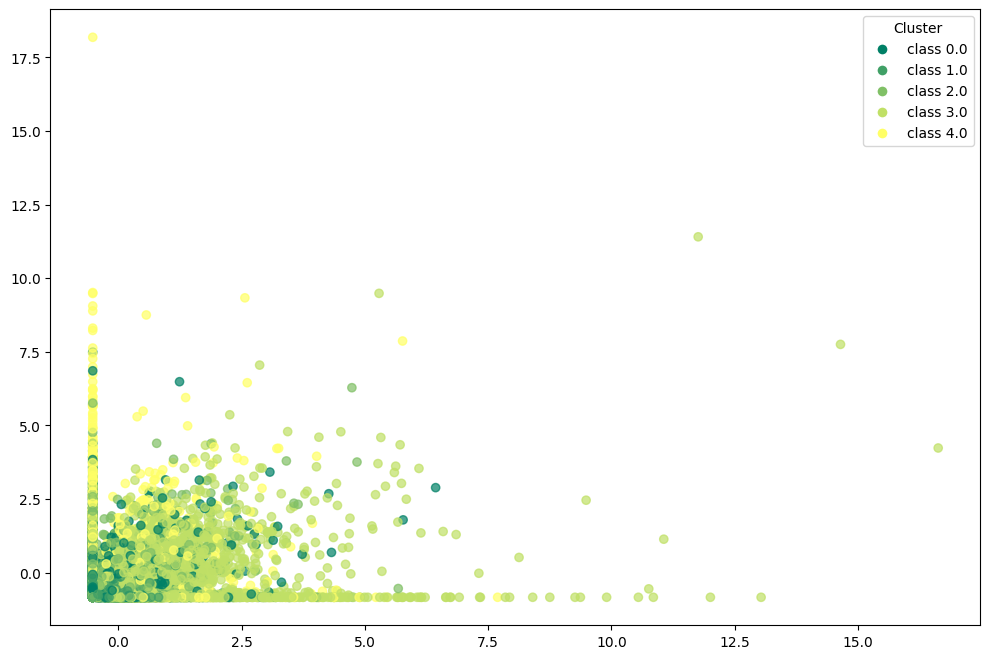

In [191]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pam_tsne.iloc[:, 0],df_pam_tsne.iloc[:, 1], 
                      c=df_pam_tsne['pam_tsne'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_tsne['pam_tsne'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

In [192]:
sil = silhouette_score(df_pam_tsne.iloc[:,:-1], df_pam_tsne['pam_tsne'])
ch = calinski_harabasz_score(df_pam_tsne.iloc[:,:-1], df_pam_tsne['pam_tsne'])
db = davies_bouldin_score(df_pam_tsne.iloc[:,:-1], df_pam_tsne['pam_tsne'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: -0.05420975124670175
Calinski-Harabasz: 543.7589570504339
Davies-Bouldin: 2.8360038873846767


### pam with umap

In [193]:
initial_medoids = np.random.choice(len(X_umap),5,replace=False)

In [194]:
metric = distance_metric(type_metric.EUCLIDEAN)

In [195]:
pam_umap = kmedoids(X_umap.values.tolist(),initial_medoids,metric=metric)

In [196]:
pam_umap.process()

In [197]:
clusters = pam_umap.get_clusters()

In [198]:
medoids = pam_umap.get_medoids()

In [199]:
labels = np.zeros(len(X_umap))
for cluster_idx, cluster in enumerate(clusters):
    for data_idx in cluster:
        labels[data_idx] = cluster_idx

In [200]:
df_pam_umap = energy_scaled.copy()

In [201]:
df_pam_umap['pam_umap'] = labels

In [202]:
df_pam_umap

KWHWTH_EUI  KWHDWH_EUI  KWHLGT_EUI  KWHTVREL_EUI  KWHCFAN_EUI  \
0       -0.518605    2.315230   -0.155420     -0.120420     0.653225   
1       -0.518605    0.922059   -0.103053      0.202698    -0.388270   
2       -0.518605   -0.099273   -0.356057     -0.775772    -0.585286   
3       -0.518605    0.051404   -0.364475      0.284224     0.845861   
4       -0.518605   -0.383855   -0.447789     -0.310388     1.198181   
...           ...         ...         ...           ...          ...   
12314    0.002562   -0.049646    0.423743     -0.274070     1.261119   
12315   -0.414364   -0.737315   -0.723795     -0.731097    -0.613026   
12316   -0.518605   -0.841286   -0.690932     -0.744420    -0.601602   
12317   -0.124951   -0.607265   -0.511546     -0.746864    -0.242523   
12318    0.111607   -0.001133   -0.404469     -0.178020    -0.135098   

       KWHDHUM_EUI  KWHHUM_EUI  KWHEVCHRG_EUI  KWHPLPMP_TOTAL_EUI  \
0        -0.335988   -0.332036      -0.088994           -0.263616   
1        -0.335988   -0.332036      -0.088994           -0.263616   
2        -0.335988   -0.332036      -0.088994           -0.263616   
3        -0.335988   -0.332036      -0.088994           -0.263616   
4        -0.335988    0.365912      -0.088994           -0.263616   
...            ...         ...            ...                 ...   
12314    -0.335988   -0.332036      -0.088994            1.248592   
12315    -0.068313   -0.332036      -0.088994           -0.263616   
12316    -0.003041   -0.332036      -0.088994           -0.263616   
12317    -0.335988   -0.332036      -0.088994           -0.263616   
12318    -0.145228   -0.210347      -0.088994           -0.263616   

       KWHCW_TOTAL_EUI  KWHCOK_TOTAL_EUI  KWHRFG_TOTAL_EUI  KWHOTH_TOTAL_EUI  \
0             2.468177          0.025226          0.501495          0.114688   
1            -0.081205          0.285323         -0.372616         -0.594208   
2            -0.759073          0.644382         -0.728603         -0.685620   
3             0.178380          0.458547         -0.653975         -0.290444   
4            -0.500705         -0.515152          0.414273         -0.159052   
...                ...               ...               ...               ...   
12314         0.070312          0.038656          0.309472         -0.106078   
12315        -0.752164         -0.737050         -1.275782         -1.009332   
12316        -0.608972         -0.497817         -0.969270         -0.901175   
12317        -0.641349         -0.592642          0.207987          0.149904   
12318        -0.146195          0.225969         -0.139171         -0.625542   

       KWHSPH_TOTAL_EUI  KWHCOL_TOTAL_EUI  pam_umap  
0             -0.451513          0.390188       0.0  
1              0.417658         -0.329103       4.0  
2             -0.529009          0.364396       1.0  
3              0.545950          0.974712       4.0  
4             -0.480799          0.272112       1.0  
...                 ...               ...       ...  
12314         -0.541066          0.377318       2.0  
12315         -0.352305         -0.869413       1.0  
12316         -0.250082         -0.701802       1.0  
12317         -0.242909          0.656418       0.0  
12318          2.617870          0.422701       4.0  

[12319 rows x 16 columns]

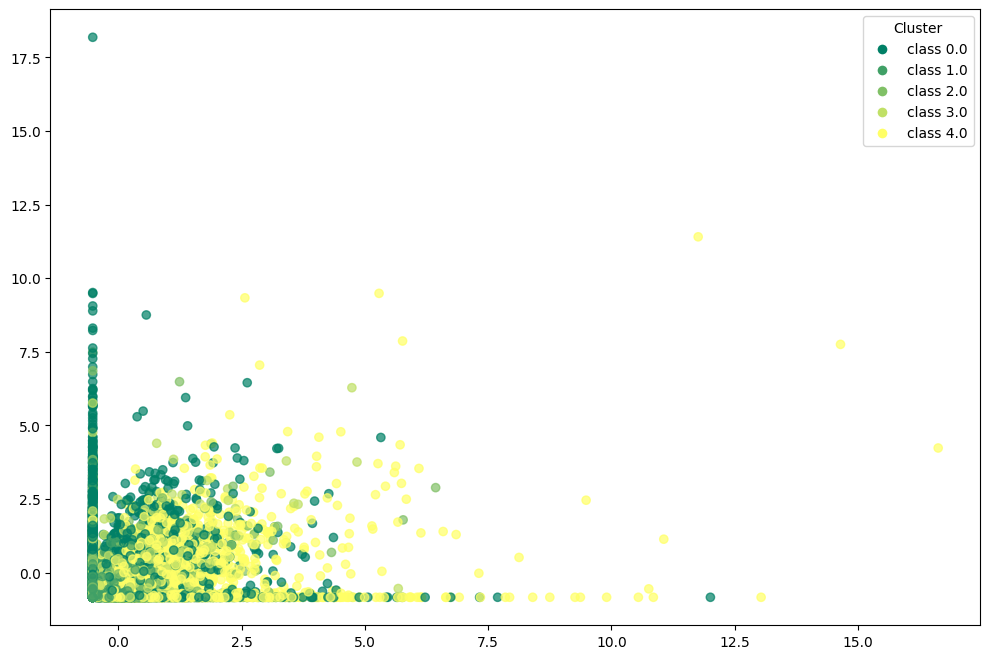

In [203]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_pam_umap.iloc[:, 0],df_pam_umap.iloc[:, 1], 
                      c=df_pam_umap['pam_umap'],cmap='summer',alpha=0.7)

unique_labels = np.unique(df_pam_umap['pam_umap'])
legend_elements = [Line2D([0], [0],marker='o',color='w',label=f'class {label}',
                          markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=8) 
                   for label in unique_labels]
plt.legend(handles=legend_elements,title="Cluster")
plt.show()

In [204]:
sil = silhouette_score(df_pam_umap.iloc[:,:-1], df_pam_umap['pam_umap'])
ch = calinski_harabasz_score(df_pam_umap.iloc[:,:-1], df_pam_umap['pam_umap'])
db = davies_bouldin_score(df_pam_umap.iloc[:,:-1], df_pam_umap['pam_umap'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.03185013070013967
Calinski-Harabasz: 692.6097674922879
Davies-Bouldin: 2.5029768958020577


## spectral clustering

In [205]:
spectral_clustering = SpectralClustering(n_clusters=5,affinity ='nearest_neighbors')

In [206]:
spectral_clustering.fit(energy_scaled)

SpectralClustering(affinity='nearest_neighbors', n_clusters=5)

In [207]:
df_spectral = energy_scaled.copy()

In [208]:
df_spectral['spectral_clustering'] = spectral_clustering.labels_

In [209]:
df_spectral

KWHWTH_EUI  KWHDWH_EUI  KWHLGT_EUI  KWHTVREL_EUI  KWHCFAN_EUI  \
0       -0.518605    2.315230   -0.155420     -0.120420     0.653225   
1       -0.518605    0.922059   -0.103053      0.202698    -0.388270   
2       -0.518605   -0.099273   -0.356057     -0.775772    -0.585286   
3       -0.518605    0.051404   -0.364475      0.284224     0.845861   
4       -0.518605   -0.383855   -0.447789     -0.310388     1.198181   
...           ...         ...         ...           ...          ...   
12314    0.002562   -0.049646    0.423743     -0.274070     1.261119   
12315   -0.414364   -0.737315   -0.723795     -0.731097    -0.613026   
12316   -0.518605   -0.841286   -0.690932     -0.744420    -0.601602   
12317   -0.124951   -0.607265   -0.511546     -0.746864    -0.242523   
12318    0.111607   -0.001133   -0.404469     -0.178020    -0.135098   

       KWHDHUM_EUI  KWHHUM_EUI  KWHEVCHRG_EUI  KWHPLPMP_TOTAL_EUI  \
0        -0.335988   -0.332036      -0.088994           -0.263616   
1        -0.335988   -0.332036      -0.088994           -0.263616   
2        -0.335988   -0.332036      -0.088994           -0.263616   
3        -0.335988   -0.332036      -0.088994           -0.263616   
4        -0.335988    0.365912      -0.088994           -0.263616   
...            ...         ...            ...                 ...   
12314    -0.335988   -0.332036      -0.088994            1.248592   
12315    -0.068313   -0.332036      -0.088994           -0.263616   
12316    -0.003041   -0.332036      -0.088994           -0.263616   
12317    -0.335988   -0.332036      -0.088994           -0.263616   
12318    -0.145228   -0.210347      -0.088994           -0.263616   

       KWHCW_TOTAL_EUI  KWHCOK_TOTAL_EUI  KWHRFG_TOTAL_EUI  KWHOTH_TOTAL_EUI  \
0             2.468177          0.025226          0.501495          0.114688   
1            -0.081205          0.285323         -0.372616         -0.594208   
2            -0.759073          0.644382         -0.728603         -0.685620   
3             0.178380          0.458547         -0.653975         -0.290444   
4            -0.500705         -0.515152          0.414273         -0.159052   
...                ...               ...               ...               ...   
12314         0.070312          0.038656          0.309472         -0.106078   
12315        -0.752164         -0.737050         -1.275782         -1.009332   
12316        -0.608972         -0.497817         -0.969270         -0.901175   
12317        -0.641349         -0.592642          0.207987          0.149904   
12318        -0.146195          0.225969         -0.139171         -0.625542   

       KWHSPH_TOTAL_EUI  KWHCOL_TOTAL_EUI  spectral_clustering  
0             -0.451513          0.390188                    1  
1              0.417658         -0.329103                    1  
2             -0.529009          0.364396                    2  
3              0.545950          0.974712                    1  
4             -0.480799          0.272112                    1  
...                 ...               ...                  ...  
12314         -0.541066          0.377318                    1  
12315         -0.352305         -0.869413                    2  
12316         -0.250082         -0.701802                    2  
12317         -0.242909          0.656418                    2  
12318          2.617870          0.422701                    1  

[12319 rows x 16 columns]

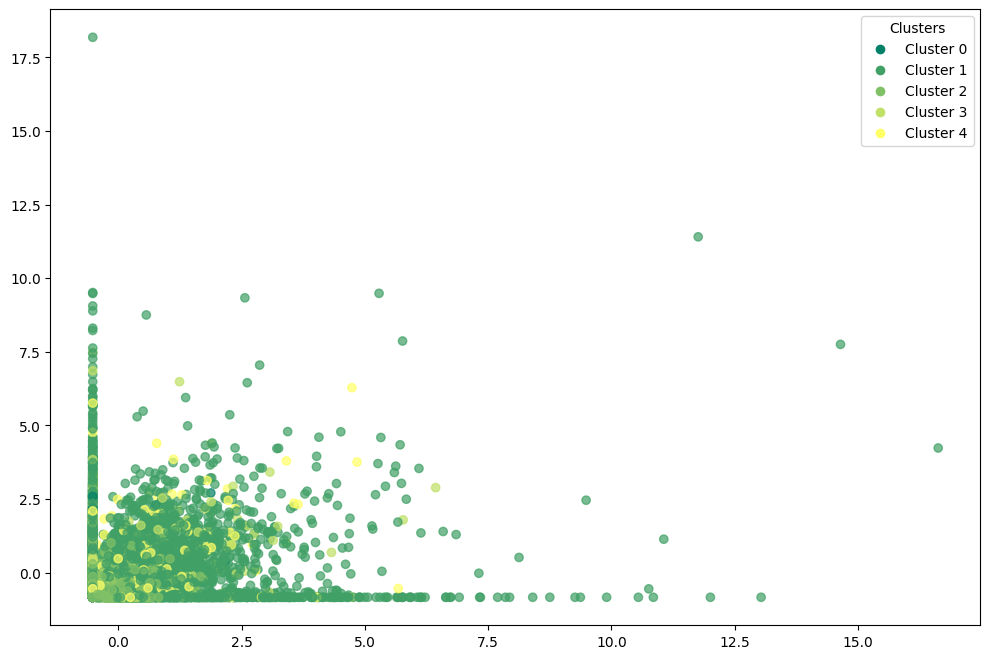

In [210]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_spectral.iloc[:, 0], df_spectral.iloc[:, 1], 
                      c=df_spectral['spectral_clustering'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_spectral['spectral_clustering'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [211]:
sil = silhouette_score(df_spectral.iloc[:,:-1], df_spectral['spectral_clustering'])
ch = calinski_harabasz_score(df_spectral.iloc[:,:-1], df_spectral['spectral_clustering'])
db = davies_bouldin_score(df_spectral.iloc[:,:-1], df_spectral['spectral_clustering'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.11934756483995024
Calinski-Harabasz: 870.596748538329
Davies-Bouldin: 1.8361417650200913


### spectral clustering with pca

In [212]:
spectral_pca = SpectralClustering(n_clusters=5,affinity ='nearest_neighbors')

In [213]:
spectral_pca.fit(X_pca)

SpectralClustering(affinity='nearest_neighbors', n_clusters=5)

In [214]:
df_pca_spectral = energy_scaled.copy()

In [215]:
df_pca_spectral["spectral_pca"] = spectral_pca.labels_

In [216]:
df_pca_spectral

KWHWTH_EUI  KWHDWH_EUI  KWHLGT_EUI  KWHTVREL_EUI  KWHCFAN_EUI  \
0       -0.518605    2.315230   -0.155420     -0.120420     0.653225   
1       -0.518605    0.922059   -0.103053      0.202698    -0.388270   
2       -0.518605   -0.099273   -0.356057     -0.775772    -0.585286   
3       -0.518605    0.051404   -0.364475      0.284224     0.845861   
4       -0.518605   -0.383855   -0.447789     -0.310388     1.198181   
...           ...         ...         ...           ...          ...   
12314    0.002562   -0.049646    0.423743     -0.274070     1.261119   
12315   -0.414364   -0.737315   -0.723795     -0.731097    -0.613026   
12316   -0.518605   -0.841286   -0.690932     -0.744420    -0.601602   
12317   -0.124951   -0.607265   -0.511546     -0.746864    -0.242523   
12318    0.111607   -0.001133   -0.404469     -0.178020    -0.135098   

       KWHDHUM_EUI  KWHHUM_EUI  KWHEVCHRG_EUI  KWHPLPMP_TOTAL_EUI  \
0        -0.335988   -0.332036      -0.088994           -0.263616   
1        -0.335988   -0.332036      -0.088994           -0.263616   
2        -0.335988   -0.332036      -0.088994           -0.263616   
3        -0.335988   -0.332036      -0.088994           -0.263616   
4        -0.335988    0.365912      -0.088994           -0.263616   
...            ...         ...            ...                 ...   
12314    -0.335988   -0.332036      -0.088994            1.248592   
12315    -0.068313   -0.332036      -0.088994           -0.263616   
12316    -0.003041   -0.332036      -0.088994           -0.263616   
12317    -0.335988   -0.332036      -0.088994           -0.263616   
12318    -0.145228   -0.210347      -0.088994           -0.263616   

       KWHCW_TOTAL_EUI  KWHCOK_TOTAL_EUI  KWHRFG_TOTAL_EUI  KWHOTH_TOTAL_EUI  \
0             2.468177          0.025226          0.501495          0.114688   
1            -0.081205          0.285323         -0.372616         -0.594208   
2            -0.759073          0.644382         -0.728603         -0.685620   
3             0.178380          0.458547         -0.653975         -0.290444   
4            -0.500705         -0.515152          0.414273         -0.159052   
...                ...               ...               ...               ...   
12314         0.070312          0.038656          0.309472         -0.106078   
12315        -0.752164         -0.737050         -1.275782         -1.009332   
12316        -0.608972         -0.497817         -0.969270         -0.901175   
12317        -0.641349         -0.592642          0.207987          0.149904   
12318        -0.146195          0.225969         -0.139171         -0.625542   

       KWHSPH_TOTAL_EUI  KWHCOL_TOTAL_EUI  spectral_pca  
0             -0.451513          0.390188             1  
1              0.417658         -0.329103             2  
2             -0.529009          0.364396             2  
3              0.545950          0.974712             2  
4             -0.480799          0.272112             2  
...                 ...               ...           ...  
12314         -0.541066          0.377318             2  
12315         -0.352305         -0.869413             0  
12316         -0.250082         -0.701802             0  
12317         -0.242909          0.656418             2  
12318          2.617870          0.422701             1  

[12319 rows x 16 columns]

### spectral clustering with t-SNE

In [217]:
spectral_tsne = SpectralClustering(n_clusters=5,affinity ='nearest_neighbors')

In [218]:
spectral_tsne.fit(X_tsne)

SpectralClustering(affinity='nearest_neighbors', n_clusters=5)

In [219]:
df_tsne_spectral = energy_scaled.copy()

In [220]:
df_tsne_spectral['spectral_tsne'] = spectral_tsne.labels_

In [221]:
df_tsne_spectral

KWHWTH_EUI  KWHDWH_EUI  KWHLGT_EUI  KWHTVREL_EUI  KWHCFAN_EUI  \
0       -0.518605    2.315230   -0.155420     -0.120420     0.653225   
1       -0.518605    0.922059   -0.103053      0.202698    -0.388270   
2       -0.518605   -0.099273   -0.356057     -0.775772    -0.585286   
3       -0.518605    0.051404   -0.364475      0.284224     0.845861   
4       -0.518605   -0.383855   -0.447789     -0.310388     1.198181   
...           ...         ...         ...           ...          ...   
12314    0.002562   -0.049646    0.423743     -0.274070     1.261119   
12315   -0.414364   -0.737315   -0.723795     -0.731097    -0.613026   
12316   -0.518605   -0.841286   -0.690932     -0.744420    -0.601602   
12317   -0.124951   -0.607265   -0.511546     -0.746864    -0.242523   
12318    0.111607   -0.001133   -0.404469     -0.178020    -0.135098   

       KWHDHUM_EUI  KWHHUM_EUI  KWHEVCHRG_EUI  KWHPLPMP_TOTAL_EUI  \
0        -0.335988   -0.332036      -0.088994           -0.263616   
1        -0.335988   -0.332036      -0.088994           -0.263616   
2        -0.335988   -0.332036      -0.088994           -0.263616   
3        -0.335988   -0.332036      -0.088994           -0.263616   
4        -0.335988    0.365912      -0.088994           -0.263616   
...            ...         ...            ...                 ...   
12314    -0.335988   -0.332036      -0.088994            1.248592   
12315    -0.068313   -0.332036      -0.088994           -0.263616   
12316    -0.003041   -0.332036      -0.088994           -0.263616   
12317    -0.335988   -0.332036      -0.088994           -0.263616   
12318    -0.145228   -0.210347      -0.088994           -0.263616   

       KWHCW_TOTAL_EUI  KWHCOK_TOTAL_EUI  KWHRFG_TOTAL_EUI  KWHOTH_TOTAL_EUI  \
0             2.468177          0.025226          0.501495          0.114688   
1            -0.081205          0.285323         -0.372616         -0.594208   
2            -0.759073          0.644382         -0.728603         -0.685620   
3             0.178380          0.458547         -0.653975         -0.290444   
4            -0.500705         -0.515152          0.414273         -0.159052   
...                ...               ...               ...               ...   
12314         0.070312          0.038656          0.309472         -0.106078   
12315        -0.752164         -0.737050         -1.275782         -1.009332   
12316        -0.608972         -0.497817         -0.969270         -0.901175   
12317        -0.641349         -0.592642          0.207987          0.149904   
12318        -0.146195          0.225969         -0.139171         -0.625542   

       KWHSPH_TOTAL_EUI  KWHCOL_TOTAL_EUI  spectral_tsne  
0             -0.451513          0.390188              2  
1              0.417658         -0.329103              2  
2             -0.529009          0.364396              2  
3              0.545950          0.974712              0  
4             -0.480799          0.272112              0  
...                 ...               ...            ...  
12314         -0.541066          0.377318              3  
12315         -0.352305         -0.869413              2  
12316         -0.250082         -0.701802              2  
12317         -0.242909          0.656418              0  
12318          2.617870          0.422701              0  

[12319 rows x 16 columns]

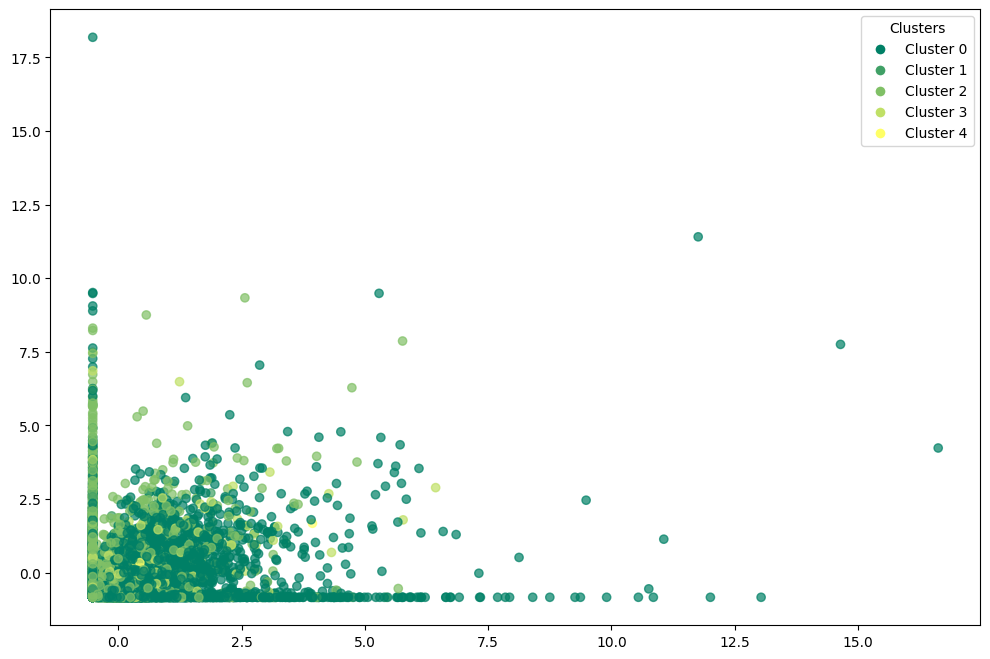

In [222]:
plt.figure(figsize=(12,8))
scatter = plt.scatter(df_tsne_spectral.iloc[:, 0], df_tsne_spectral.iloc[:, 1], 
                      c=df_tsne_spectral['spectral_tsne'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_tsne_spectral['spectral_tsne'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [223]:
sil = silhouette_score(df_tsne_spectral.iloc[:,:-1], df_tsne_spectral['spectral_tsne'])
ch = calinski_harabasz_score(df_tsne_spectral.iloc[:,:-1], df_tsne_spectral['spectral_tsne'])
db = davies_bouldin_score(df_tsne_spectral.iloc[:,:-1], df_tsne_spectral['spectral_tsne'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.048394594243046714
Calinski-Harabasz: 404.9420994240658
Davies-Bouldin: 2.3432801118369904


### spectral clustering with umap

In [224]:
spectral_umap = SpectralClustering(n_clusters=5,affinity ='nearest_neighbors')

In [225]:
spectral_umap.fit(X_umap)

SpectralClustering(affinity='nearest_neighbors', n_clusters=5)

In [226]:
df_umap_spectral = energy_scaled.copy()

In [227]:
df_umap_spectral['spectral_umap'] = spectral_umap.labels_

In [228]:
df_umap_spectral

KWHWTH_EUI  KWHDWH_EUI  KWHLGT_EUI  KWHTVREL_EUI  KWHCFAN_EUI  \
0       -0.518605    2.315230   -0.155420     -0.120420     0.653225   
1       -0.518605    0.922059   -0.103053      0.202698    -0.388270   
2       -0.518605   -0.099273   -0.356057     -0.775772    -0.585286   
3       -0.518605    0.051404   -0.364475      0.284224     0.845861   
4       -0.518605   -0.383855   -0.447789     -0.310388     1.198181   
...           ...         ...         ...           ...          ...   
12314    0.002562   -0.049646    0.423743     -0.274070     1.261119   
12315   -0.414364   -0.737315   -0.723795     -0.731097    -0.613026   
12316   -0.518605   -0.841286   -0.690932     -0.744420    -0.601602   
12317   -0.124951   -0.607265   -0.511546     -0.746864    -0.242523   
12318    0.111607   -0.001133   -0.404469     -0.178020    -0.135098   

       KWHDHUM_EUI  KWHHUM_EUI  KWHEVCHRG_EUI  KWHPLPMP_TOTAL_EUI  \
0        -0.335988   -0.332036      -0.088994           -0.263616   
1        -0.335988   -0.332036      -0.088994           -0.263616   
2        -0.335988   -0.332036      -0.088994           -0.263616   
3        -0.335988   -0.332036      -0.088994           -0.263616   
4        -0.335988    0.365912      -0.088994           -0.263616   
...            ...         ...            ...                 ...   
12314    -0.335988   -0.332036      -0.088994            1.248592   
12315    -0.068313   -0.332036      -0.088994           -0.263616   
12316    -0.003041   -0.332036      -0.088994           -0.263616   
12317    -0.335988   -0.332036      -0.088994           -0.263616   
12318    -0.145228   -0.210347      -0.088994           -0.263616   

       KWHCW_TOTAL_EUI  KWHCOK_TOTAL_EUI  KWHRFG_TOTAL_EUI  KWHOTH_TOTAL_EUI  \
0             2.468177          0.025226          0.501495          0.114688   
1            -0.081205          0.285323         -0.372616         -0.594208   
2            -0.759073          0.644382         -0.728603         -0.685620   
3             0.178380          0.458547         -0.653975         -0.290444   
4            -0.500705         -0.515152          0.414273         -0.159052   
...                ...               ...               ...               ...   
12314         0.070312          0.038656          0.309472         -0.106078   
12315        -0.752164         -0.737050         -1.275782         -1.009332   
12316        -0.608972         -0.497817         -0.969270         -0.901175   
12317        -0.641349         -0.592642          0.207987          0.149904   
12318        -0.146195          0.225969         -0.139171         -0.625542   

       KWHSPH_TOTAL_EUI  KWHCOL_TOTAL_EUI  spectral_umap  
0             -0.451513          0.390188              1  
1              0.417658         -0.329103              1  
2             -0.529009          0.364396              3  
3              0.545950          0.974712              1  
4             -0.480799          0.272112              3  
...                 ...               ...            ...  
12314         -0.541066          0.377318              2  
12315         -0.352305         -0.869413              3  
12316         -0.250082         -0.701802              3  
12317         -0.242909          0.656418              1  
12318          2.617870          0.422701              1  

[12319 rows x 16 columns]

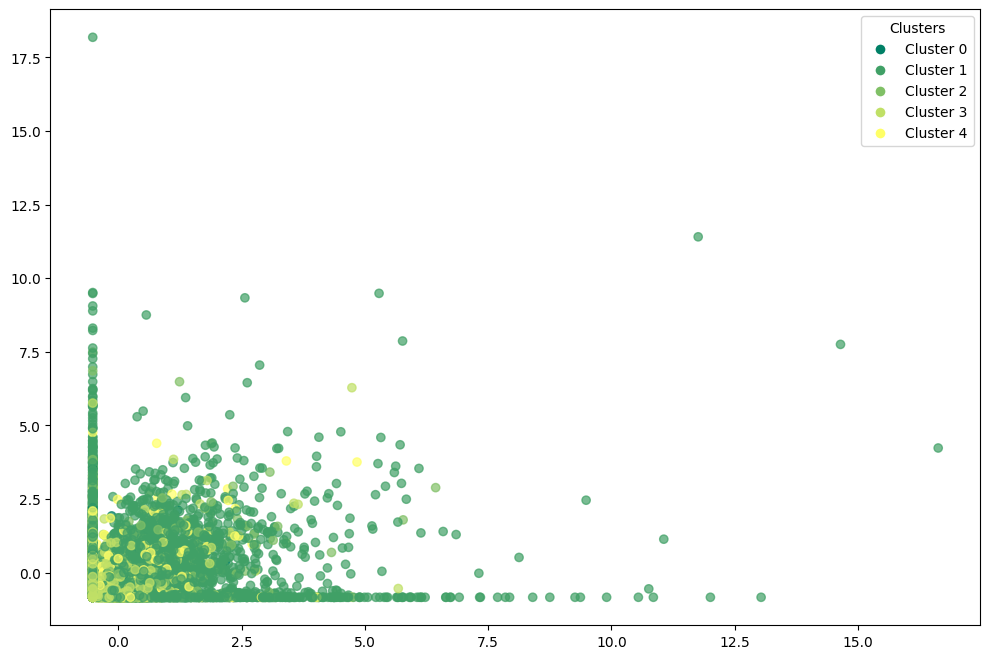

In [229]:
plt.figure(figsize=(12,8)) 
scatter = plt.scatter(df_umap_spectral.iloc[:, 0], df_umap_spectral.iloc[:, 1], 
                      c=df_umap_spectral['spectral_umap'], cmap='summer', alpha=0.7)
unique_clusters = np.unique(df_umap_spectral['spectral_umap'])
legend_elements = [Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}',
                          markerfacecolor=scatter.cmap(scatter.norm(cluster)), markersize=8) 
                   for cluster in unique_clusters]
plt.legend(handles=legend_elements, title="Clusters")
plt.show()

In [230]:
sil = silhouette_score(df_umap_spectral.iloc[:,:-1], df_umap_spectral['spectral_umap'])
ch = calinski_harabasz_score(df_umap_spectral.iloc[:,:-1], df_umap_spectral['spectral_umap'])
db = davies_bouldin_score(df_umap_spectral.iloc[:,:-1], df_umap_spectral['spectral_umap'])

print("Silhouette:", sil)
print("Calinski-Harabasz:", ch)
print("Davies-Bouldin:", db)

Silhouette: 0.08141333344035225
Calinski-Harabasz: 591.0124388853101
Davies-Bouldin: 2.055834383670178


# internal measures

In [232]:
results = {}

def evaluate_clustering(X, y_pred):

    scores = {
        "Silhouette": silhouette_score(X, y_pred),
        "Davies Bouldin": davies_bouldin_score(X, y_pred),
        "Calinski Harabasz": calinski_harabasz_score(X, y_pred),
        
    }
    return scores

def evaluate_and_store(name, X, y_pred):
    scores = evaluate_clustering(X, y_pred)
    results[name] = scores

# k-means
evaluate_and_store("k-means",df_kmeans.drop(['k_means'],axis=1).values,df_kmeans['k_means'])

evaluate_and_store("k-means + pca",df_pca_kmeans.drop(['kmeans_pca'],axis=1).values,df_pca_kmeans['kmeans_pca'])

evaluate_and_store("k-means + tsne",df_tsne_kmeans.drop(['kmeans_tsne'],axis=1).values,df_tsne_kmeans['kmeans_tsne'])

evaluate_and_store("k-means + umap",df_umap_kmeans.drop(['kmeans_umap'],axis=1).values,df_umap_kmeans['kmeans_umap'])

# Birch
evaluate_and_store("Birch",df_birch.drop(['birch'],axis=1).values,df_birch['birch'])

evaluate_and_store("Birch + pca",df_pca_birch.drop(['birch_pca'],axis=1).values,df_pca_birch['birch_pca'])

evaluate_and_store("Birch + tsne",df_tsne_birch.drop(['birch_tsne'],axis=1).values,df_tsne_birch['birch_tsne'])

evaluate_and_store("Birch + umap",df_umap_birch.drop(['birch_umap'],axis=1).values,df_umap_birch['birch_umap'])

# GMM
evaluate_and_store("GMM",df_gmm.drop(['gmm'],axis=1).values,df_gmm['gmm'])

evaluate_and_store("GMM + pca",df_pca_gmm.drop(['gmm_pca'],axis=1).values,df_pca_gmm['gmm_pca'])

evaluate_and_store("GMM + tsne",df_tsne_gmm.drop(['gmm_tsne'],axis=1).values,df_tsne_gmm['gmm_tsne'])

evaluate_and_store("GMM + umap",df_umap_gmm.drop(['gmm_umap'],axis=1).values,df_umap_gmm['gmm_umap'])

# PAM
evaluate_and_store("PAM",df_pam.drop(['pam'],axis=1).values,df_pam['pam'])

evaluate_and_store("PAM + pca",df_pam_pca.drop(['pam_pca'],axis=1).values,df_pam_pca['pam_pca'])

evaluate_and_store("PAM + tsne",df_pam_tsne.drop(['pam_tsne'],axis=1).values,df_pam_tsne['pam_tsne'])

evaluate_and_store("PAM + umap",df_pam_umap.drop(['pam_umap'],axis=1).values,df_pam_umap['pam_umap'])

# Spectral clustering
evaluate_and_store("Spectral Clustering",df_spectral.drop(['spectral_clustering'],axis=1).values,df_spectral['spectral_clustering'])

evaluate_and_store("Spectral Clustering + pca",df_pca_spectral.drop(['spectral_pca'],axis=1).values,df_pca_spectral['spectral_pca'])

evaluate_and_store("Spectral Clustering + tsne",df_tsne_spectral.drop(['spectral_tsne'],axis=1).values,df_tsne_spectral['spectral_tsne'])

evaluate_and_store("Spectral Clustering + umap",df_umap_spectral.drop(['spectral_umap'],axis=1).values,df_umap_spectral['spectral_umap'])


df_results = pd.DataFrame(results).T  
df_results = df_results.round(3)    

print(df_results)

                            Silhouette  Davies Bouldin  Calinski Harabasz
k-means                          0.251           1.884           1106.151
k-means + pca                    0.212           2.043           1033.032
k-means + tsne                  -0.065           2.825            499.359
k-means + umap                  -0.023           2.407            651.846
Birch                            0.133           1.903            586.036
Birch + pca                      0.553           1.312            688.650
Birch + tsne                    -0.028           2.995            494.617
Birch + umap                     0.044           2.362            627.836
GMM                             -0.008           3.394            434.401
GMM + pca                        0.016           3.610            670.933
GMM + tsne                      -0.010           2.996            545.494
GMM + umap                      -0.169           2.185            486.163
PAM                              0.004